# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import essential libraries for data manipulation and analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [3]:
# Importing the file porter_data_1.csv
porter = pd.read_csv('porter_data_1.csv')

In [5]:
porter.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [7]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

In [9]:
porter.describe()

market_id  store_primary_category  order_protocol    total_items  \
count  175777.000000           175777.000000   175777.000000  175777.000000   
mean        2.743726               35.887949        2.911752       3.204976   
std         1.330963               20.728254        1.513128       2.674055   
min         1.000000                0.000000        1.000000       1.000000   
25%         2.000000               18.000000        1.000000       2.000000   
50%         2.000000               38.000000        3.000000       3.000000   
75%         4.000000               55.000000        4.000000       4.000000   
max         6.000000               72.000000        7.000000     411.000000   

            subtotal  num_distinct_items  min_item_price  max_item_price  \
count  175777.000000       175777.000000   175777.000000   175777.000000   
mean     2697.111147            2.675060      684.965433     1160.158616   
std      1828.554893            1.625681      519.882924      560.828571   
min         0.000000            1.000000      -86.000000        0.000000   
25%      1412.000000            1.000000      299.000000      799.000000   
50%      2224.000000            2.000000      595.000000     1095.000000   
75%      3410.000000            3.000000      942.000000     1395.000000   
max     26800.000000           20.000000    14700.000000    14700.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          175777.000000       175777.000000             175777.000000   
mean               44.918664           41.861381                 58.230115   
std                34.544724           32.168505                 52.731043   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           63.000000                 85.000000   
max               171.000000          154.000000                285.000000   

            distance  
count  175777.000000  
mean       21.843090  
std         8.748712  
min         0.000000  
25%        15.360000  
50%        21.760000  
75%        28.120000  
max        83.520000

In [11]:
# Identifying the missing Values present for each column and their total count
missing_value_count = porter.isnull().sum()
missing_value_count

market_id                   0
created_at                  0
actual_delivery_time        0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_dashers       0
total_busy_dashers          0
total_outstanding_orders    0
distance                    0
dtype: int64

#no null values


## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [13]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
porter['created_at'] = pd.to_datetime(porter['created_at'])
porter['actual_delivery_time'] = pd.to_datetime(porter['actual_delivery_time'])
porter.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             3.0            4      4771                   3             820   
3             1.0            1      1525                   1            1525   
4             1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  
0                      21.0     34.44  
1                       2.0     27.60  
2                      18.0     11.56  
3                       8.0     31.80  
4                       7.0      8.20

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [15]:
# Convert categorical features to category type

categorical_features_list =['market_id','store_primary_category','order_protocol']
for feature in categorical_features_list:
    porter[feature] = porter[feature].astype('category')
print(porter.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

In [17]:
#Creating  dummy variables from the categorical features

dummies_list = pd.get_dummies(porter[categorical_features_list], drop_first=True, dtype=int)


In [19]:
#Creating  dummy variables from the categorical features

dummies_list = pd.get_dummies(porter[categorical_features_list], drop_first=True, dtype=int)


In [21]:
#Droppping the original categorical columns from the DataFrame
porter_non_categorical = porter.drop(columns=categorical_features_list)


In [23]:
porter_non_categorical.head()

created_at actual_delivery_time  total_items  subtotal  \
0 2015-02-06 22:24:17  2015-02-06 23:11:17            4      3441   
1 2015-02-10 21:49:25  2015-02-10 22:33:25            1      1900   
2 2015-02-16 00:11:35  2015-02-16 01:06:35            4      4771   
3 2015-02-12 03:36:46  2015-02-12 04:35:46            1      1525   
4 2015-01-27 02:12:36  2015-01-27 02:58:36            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [25]:
#Combining the non-categorical data with the dummy variables
model_input = pd.concat([porter_non_categorical, dummies_list], axis=1)

model_input.head()

created_at actual_delivery_time  total_items  subtotal  \
0 2015-02-06 22:24:17  2015-02-06 23:11:17            4      3441   
1 2015-02-10 21:49:25  2015-02-10 22:33:25            1      1900   
2 2015-02-16 00:11:35  2015-02-16 01:06:35            4      4771   
3 2015-02-12 03:36:46  2015-02-12 04:35:46            1      1525   
4 2015-01-27 02:12:36  2015-01-27 02:58:36            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  ...  \
0                14.0                      21.0  ...   
1                 2.0                       2.0  ...   
2                 6.0                      18.0  ...   
3                 6.0                       8.0  ...   
4                 5.0                       7.0  ...   

   store_primary_category_69  store_primary_category_70  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   store_primary_category_71  store_primary_category_72  order_protocol_2.0  \
0                          0                          0                   0   
1                          0                          0                   1   
2                          0                          0                   0   
3                          0                          0                   0   
4                          0                          0                   0   

   order_protocol_3.0  order_protocol_4.0  order_protocol_5.0  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   1                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   order_protocol_6.0  order_protocol_7.0  
0                   0                   0  
1                   0                   0  
2                   0                   0  
3                   0                   0  
4                   0                   0  

[5 rows x 94 columns]

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [27]:
# Calculate time taken in minutes
porter['delivery_duration_in_minutes']=(porter['actual_delivery_time']-porter['created_at']).dt.total_seconds()/60

In [29]:
porter.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  delivery_duration_in_minutes  
0                      21.0     34.44                          47.0  
1                       2.0     27.60                          44.0  
2                      18.0     11.56                          55.0  
3                       8.0     31.80                          59.0  
4                       7.0      8.20                          46.0

In [31]:
porter['delivery_duration_in_minutes'].head()

0    47.0
1    44.0
2    55.0
3    59.0
4    46.0
Name: delivery_duration_in_minutes, dtype: float64

In [35]:
model_input['delivery_duration_in_minutes']=(model_input['actual_delivery_time']-model_input['created_at']).dt.total_seconds()/60
model_input.head()

created_at actual_delivery_time  total_items  subtotal  \
0 2015-02-06 22:24:17  2015-02-06 23:11:17            4      3441   
1 2015-02-10 21:49:25  2015-02-10 22:33:25            1      1900   
2 2015-02-16 00:11:35  2015-02-16 01:06:35            4      4771   
3 2015-02-12 03:36:46  2015-02-12 04:35:46            1      1525   
4 2015-01-27 02:12:36  2015-01-27 02:58:36            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  ...  \
0                14.0                      21.0  ...   
1                 2.0                       2.0  ...   
2                 6.0                      18.0  ...   
3                 6.0                       8.0  ...   
4                 5.0                       7.0  ...   

   store_primary_category_70  store_primary_category_71  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   store_primary_category_72  order_protocol_2.0  order_protocol_3.0  \
0                          0                   0                   0   
1                          0                   1                   0   
2                          0                   0                   1   
3                          0                   0                   0   
4                          0                   0                   0   

   order_protocol_4.0  order_protocol_5.0  order_protocol_6.0  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   order_protocol_7.0  delivery_duration_in_minutes  
0                   0                          47.0  
1                   0                          44.0  
2                   0                          55.0  
3                   0                          59.0  
4                   0                          46.0  

[5 rows x 95 columns]

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [37]:
# Extract the hour and day of week from the 'created_at' timestamp
porter['order_hour'] = porter['created_at'].dt.hour
porter['order_day'] = porter['created_at'].dt.dayofweek


# Create a categorical feature 'isWeekend'
porter['isWeekend'] = porter['order_day'].apply(lambda x: 1 if x in (5,6) else 0)



In [39]:
model_input['order_hour'] = model_input['created_at'].dt.hour
model_input['order_day'] = model_input['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
model_input['isWeekend'] = model_input['order_day'].apply(lambda x: 1 if x in (5,6) else 0)

In [41]:
# Drop unnecessary columns
porter.drop(columns=['created_at', 'actual_delivery_time'], inplace=True)

In [43]:
model_input.drop(columns=['created_at', 'actual_delivery_time'], inplace=True)

In [45]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   market_id                     175777 non-null  category
 1   store_primary_category        175777 non-null  category
 2   order_protocol                175777 non-null  category
 3   total_items                   175777 non-null  int64   
 4   subtotal                      175777 non-null  int64   
 5   num_distinct_items            175777 non-null  int64   
 6   min_item_price                175777 non-null  int64   
 7   max_item_price                175777 non-null  int64   
 8   total_onshift_dashers         175777 non-null  float64 
 9   total_busy_dashers            175777 non-null  float64 
 10  total_outstanding_orders      175777 non-null  float64 
 11  distance                      175777 non-null  float64 
 12  delivery_duration_in_minutes  

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [47]:
model_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 96 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   total_items                   175777 non-null  int64  
 1   subtotal                      175777 non-null  int64  
 2   num_distinct_items            175777 non-null  int64  
 3   min_item_price                175777 non-null  int64  
 4   max_item_price                175777 non-null  int64  
 5   total_onshift_dashers         175777 non-null  float64
 6   total_busy_dashers            175777 non-null  float64
 7   total_outstanding_orders      175777 non-null  float64
 8   distance                      175777 non-null  float64
 9   market_id_2.0                 175777 non-null  int64  
 10  market_id_3.0                 175777 non-null  int64  
 11  market_id_4.0                 175777 non-null  int64  
 12  market_id_5.0                 175777 non-nul

In [49]:
# Define target variable (y) and features (X)
y = model_input['delivery_duration_in_minutes']


# Define the input features (X) by dropping the target column
X = model_input.drop(columns=['delivery_duration_in_minutes'])


# Displaying the newly created X & y
print(y.shape)

print(X.shape)


(175777,)
(175777, 95)


In [51]:
X.head()

total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0            4      3441                   4             557            1239   
1            1      1900                   1            1400            1400   
2            4      4771                   3             820            1604   
3            1      1525                   1            1525            1525   
4            2      3620                   2            1425            2195   

   total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0                   33.0                14.0                      21.0   
1                    1.0                 2.0                       2.0   
2                    8.0                 6.0                      18.0   
3                    5.0                 6.0                       8.0   
4                    5.0                 5.0                       7.0   

   distance  market_id_2.0  ...  store_primary_category_72  \
0     34.44              0  ...                          0   
1     27.60              1  ...                          0   
2     11.56              1  ...                          0   
3     31.80              0  ...                          0   
4      8.20              0  ...                          0   

   order_protocol_2.0  order_protocol_3.0  order_protocol_4.0  \
0                   0                   0                   0   
1                   1                   0                   0   
2                   0                   1                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   order_protocol_5.0  order_protocol_6.0  order_protocol_7.0  order_hour  \
0                   0                   0                   0          22   
1                   0                   0                   0          21   
2                   0                   0                   0           0   
3                   0                   0                   0           3   
4                   0                   0                   0           2   

   order_day  isWeekend  
0          4          0  
1          1          0  
2          0          0  
3          3          0  
4          1          0  

[5 rows x 95 columns]

In [53]:
y.head()

0    47.0
1    44.0
2    55.0
3    59.0
4    46.0
Name: delivery_duration_in_minutes, dtype: float64

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [55]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=100)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_train shape:",X_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (140621, 95)
X_test shape: (35156, 95)
X_train shape: (140621, 95)
y_test shape: (35156,)


In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 42111 to 38408
Data columns (total 95 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   total_items                140621 non-null  int64  
 1   subtotal                   140621 non-null  int64  
 2   num_distinct_items         140621 non-null  int64  
 3   min_item_price             140621 non-null  int64  
 4   max_item_price             140621 non-null  int64  
 5   total_onshift_dashers      140621 non-null  float64
 6   total_busy_dashers         140621 non-null  float64
 7   total_outstanding_orders   140621 non-null  float64
 8   distance                   140621 non-null  float64
 9   market_id_2.0              140621 non-null  int64  
 10  market_id_3.0              140621 non-null  int64  
 11  market_id_4.0              140621 non-null  int64  
 12  market_id_5.0              140621 non-null  int64  
 13  market_id_6.0              1406

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [59]:
# Define numerical and categorical columns for easy EDA and data manipulation


#List all numerical columns 
numerical_columns = ['total_items','subtotal','num_distinct_items','min_item_price','max_item_price','total_onshift_dashers','total_busy_dashers','total_outstanding_orders','distance','order_hour','order_day']
print(numerical_columns)


['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour', 'order_day']


In [61]:
# List all Categorical columns
categorical_columns = ['market_id','store_primary_category','order_protocol','isWeekend']
print (categorical_columns)

['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

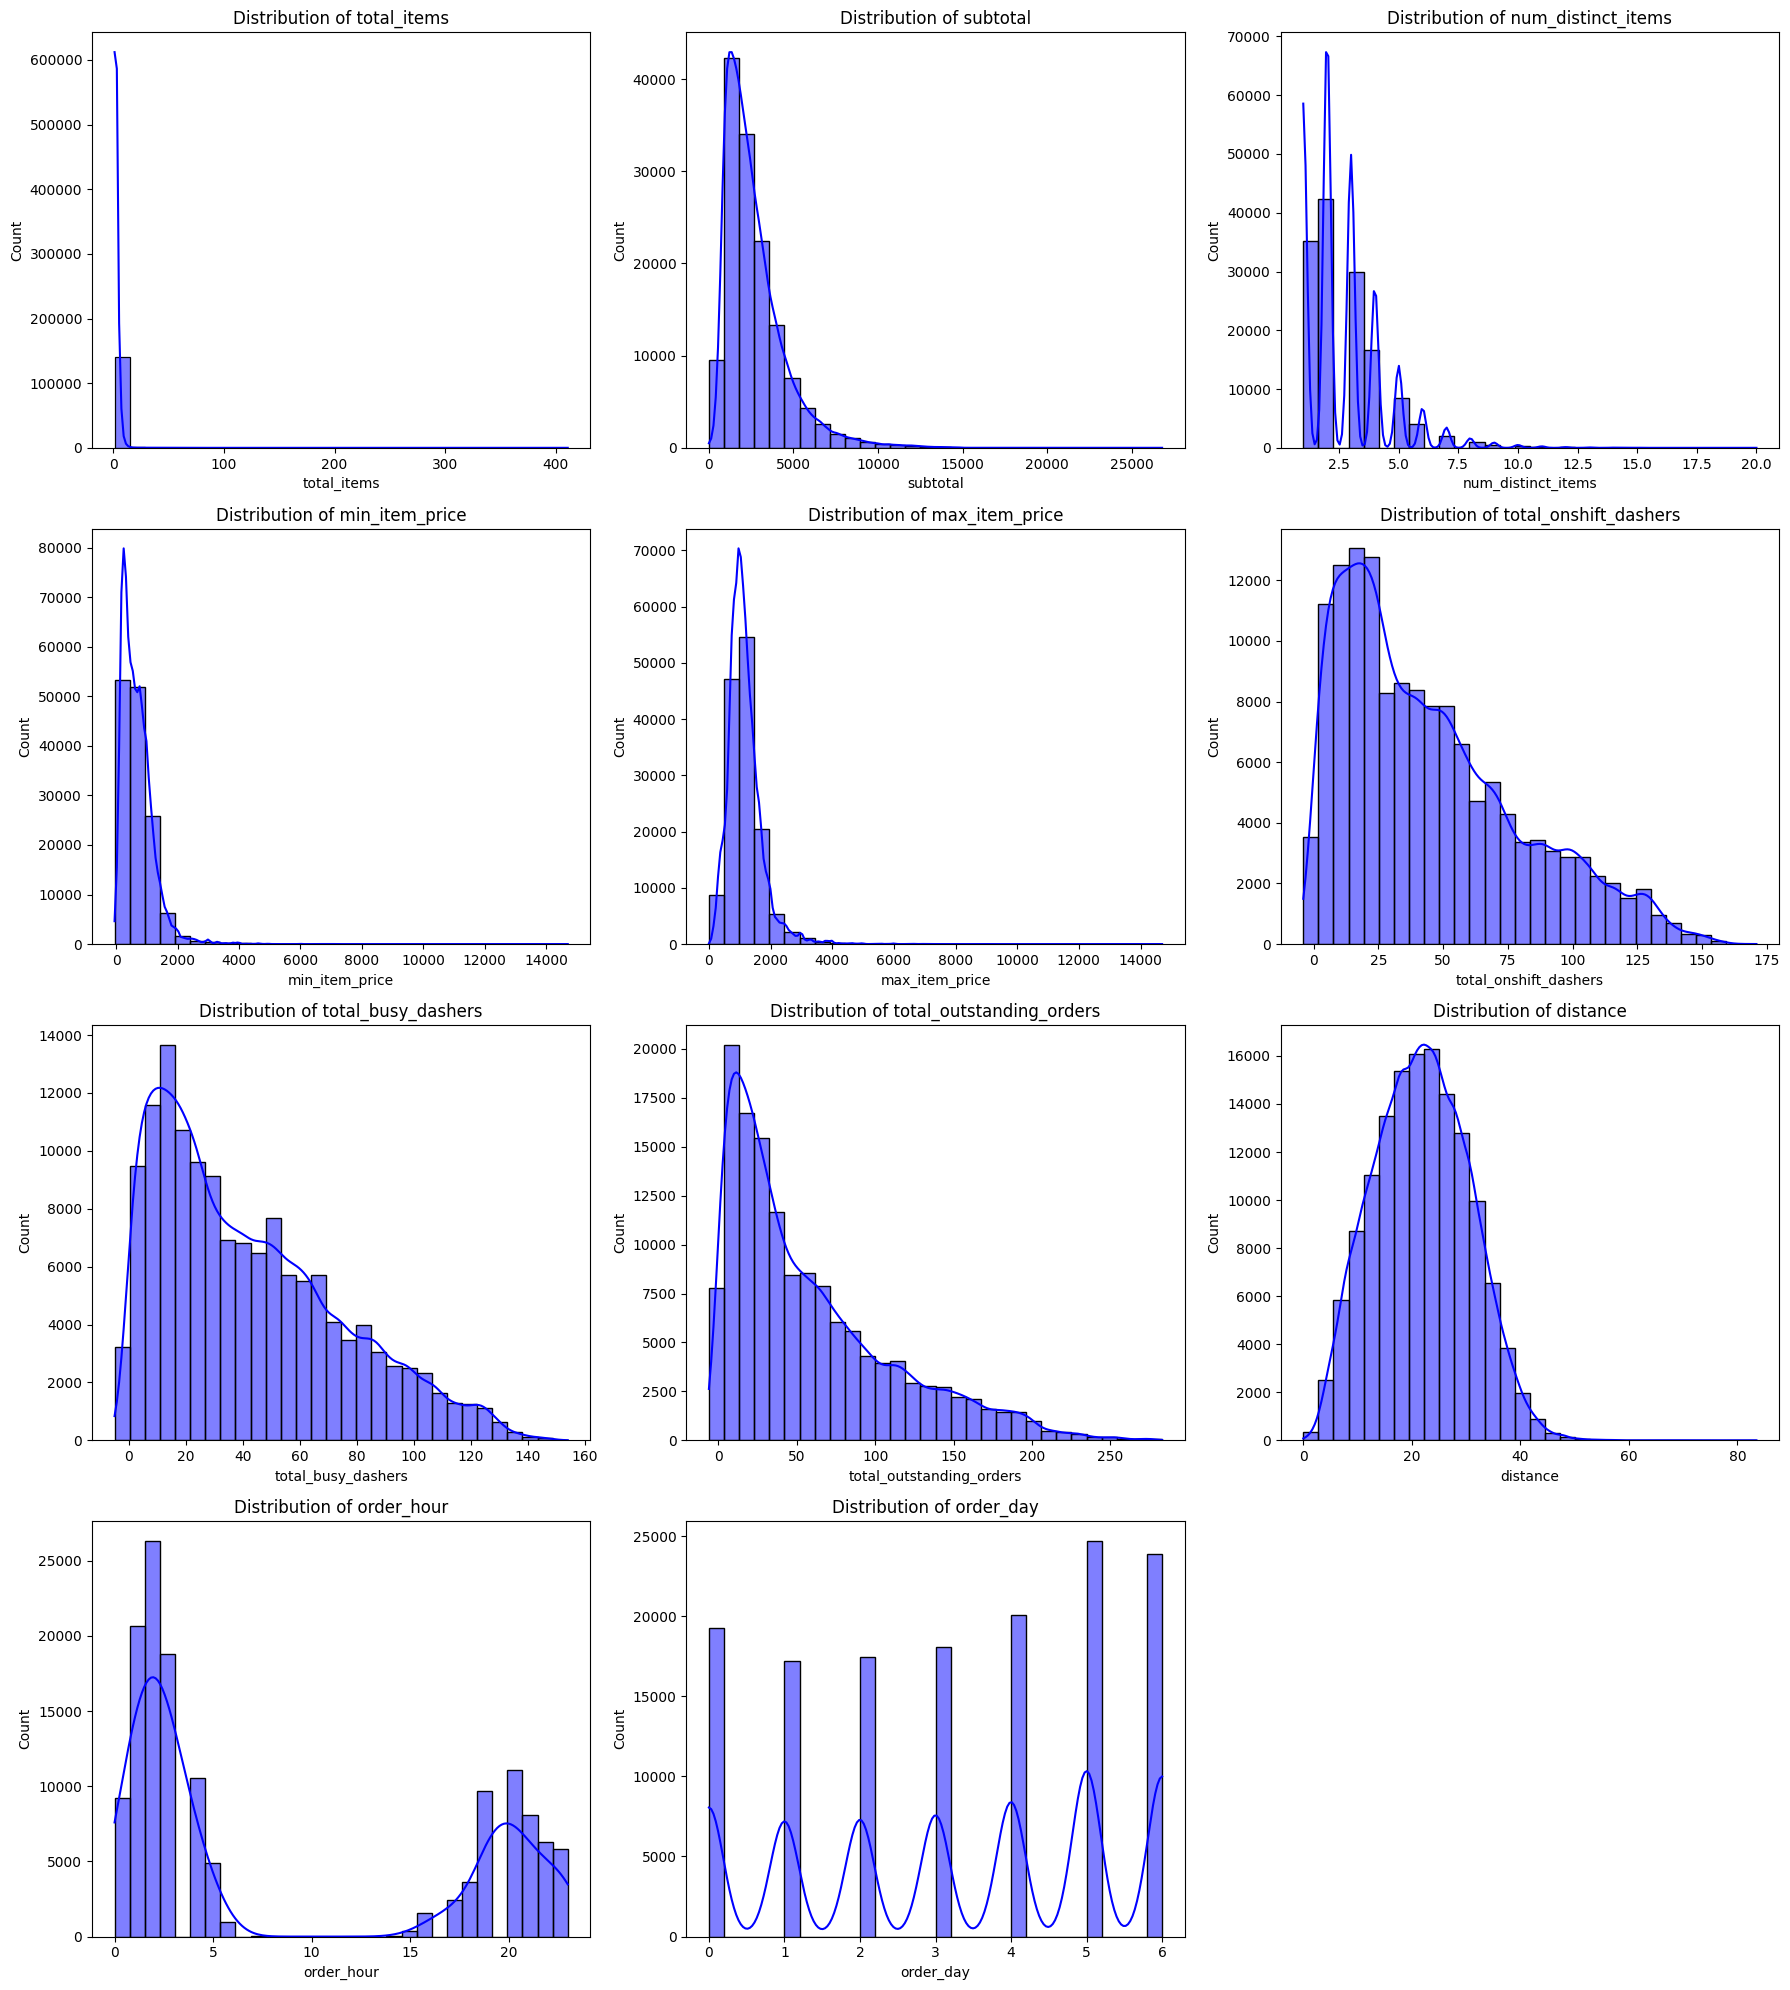

In [63]:
# Plot distributions for all numerical columns

num_plots = len(numerical_columns)
rows = (num_plots // 3) + int(num_plots % 3 > 0)

plt.figure(figsize=(18, 5 * rows))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(data=X_train, x=col, kde=True, bins=30, color='blue')  
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

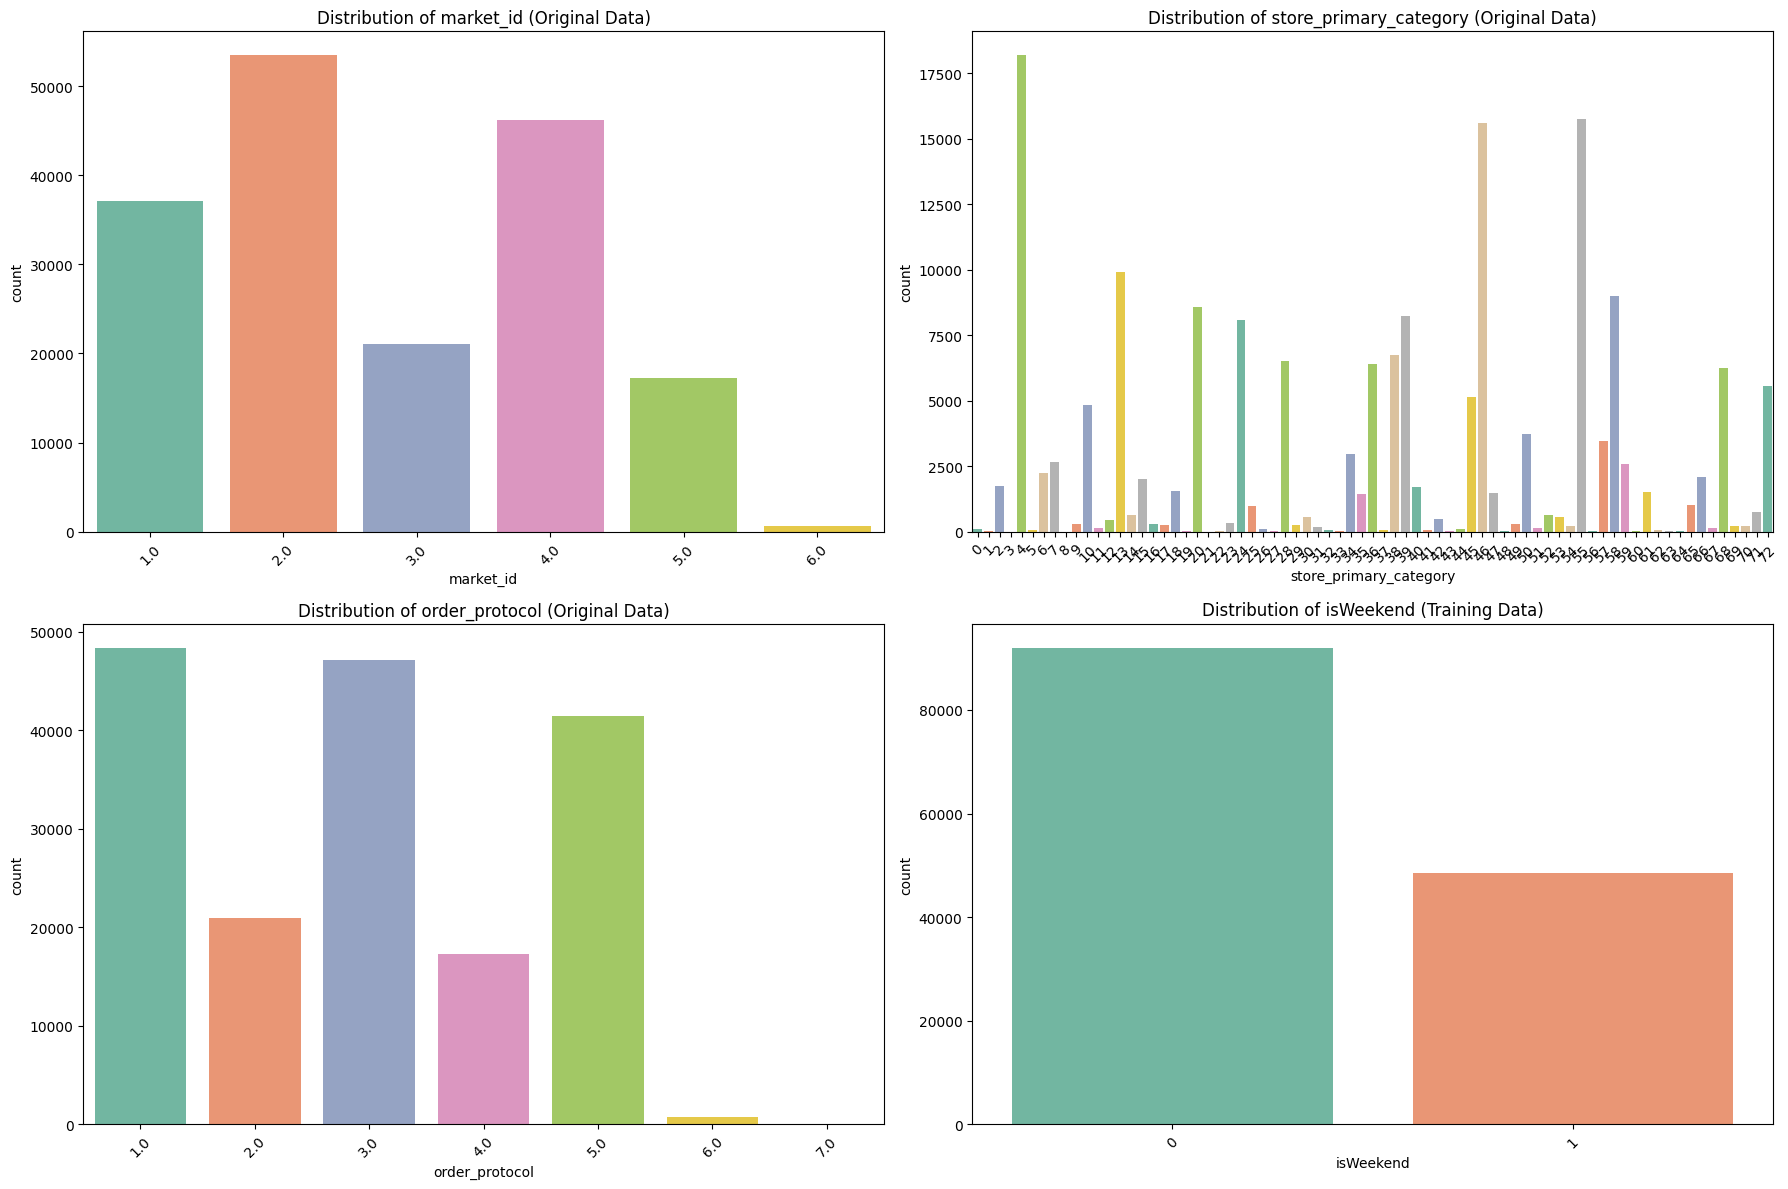

In [67]:
# Distribution of categorical columns

plt.figure(figsize=(18, 12))

# Plot for original dataframe categorical variables
categorical_cols = ['market_id', 'store_primary_category', 'order_protocol']
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=porter, x=col, palette='Set2')
    plt.title(f'Distribution of {col} (Original Data)')
    plt.xticks(rotation=45)

# Plot for training dataframe categorical variable
plt.subplot(2, 2, 4)
sns.countplot(x=X_train['isWeekend'], palette='Set2')
plt.title('Distribution of isWeekend (Training Data)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

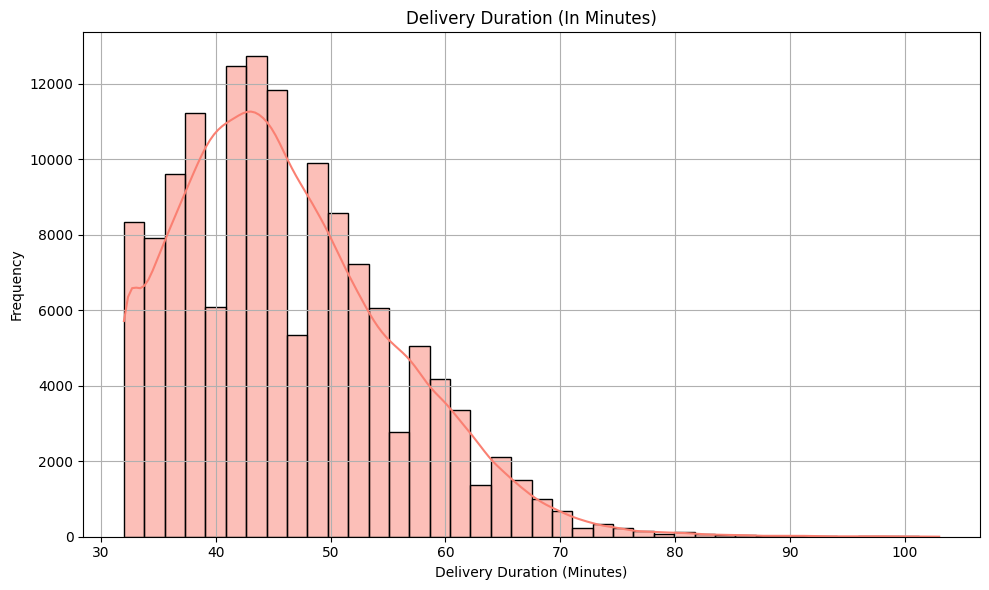

In [69]:
# Distribution of time_taken

plt.figure(figsize=(10, 6))
sns.histplot(x=y_train,kde=True, bins=40, color='salmon')
plt.title('Delivery Duration (In Minutes)')
plt.xlabel('Delivery Duration (Minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

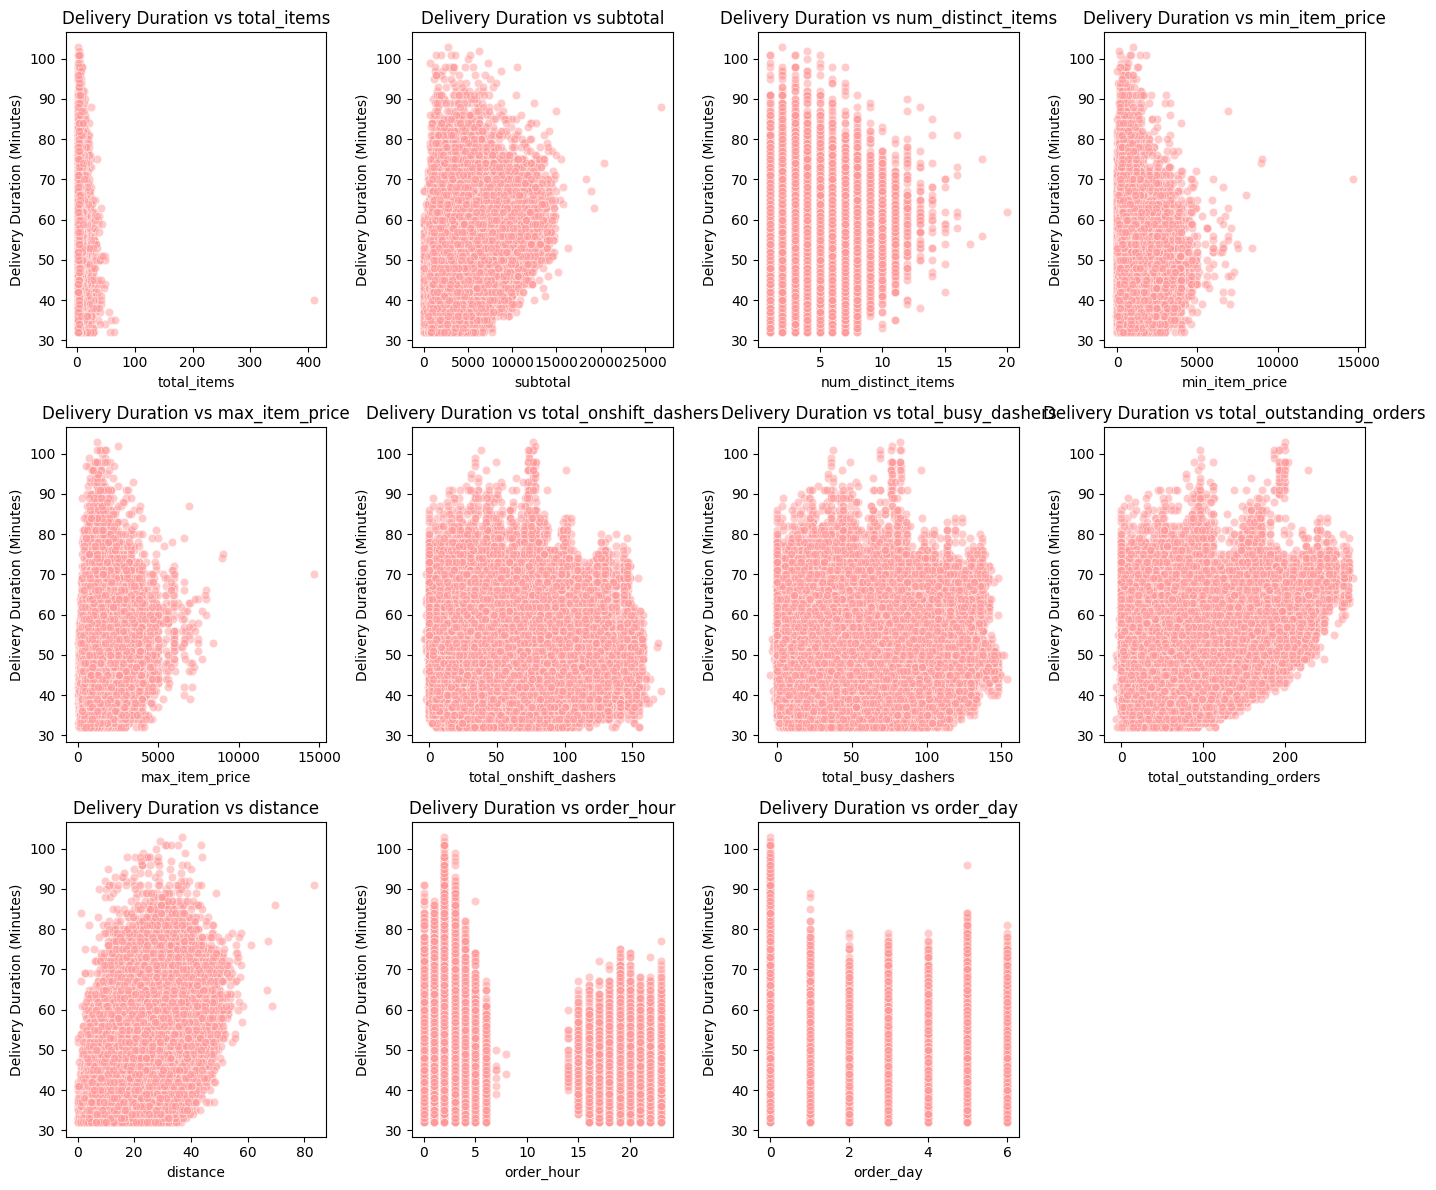

In [71]:
# Scatter plot to visualise the relationship between time_taken and other features

plt.figure(figsize=(14,12)) 
for i, feature in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.scatterplot(x=X_train[feature], y=y_train, alpha=0.5, color='#FF9999')
    plt.title(f'Delivery Duration vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Delivery Duration (Minutes)')
    plt.tight_layout()

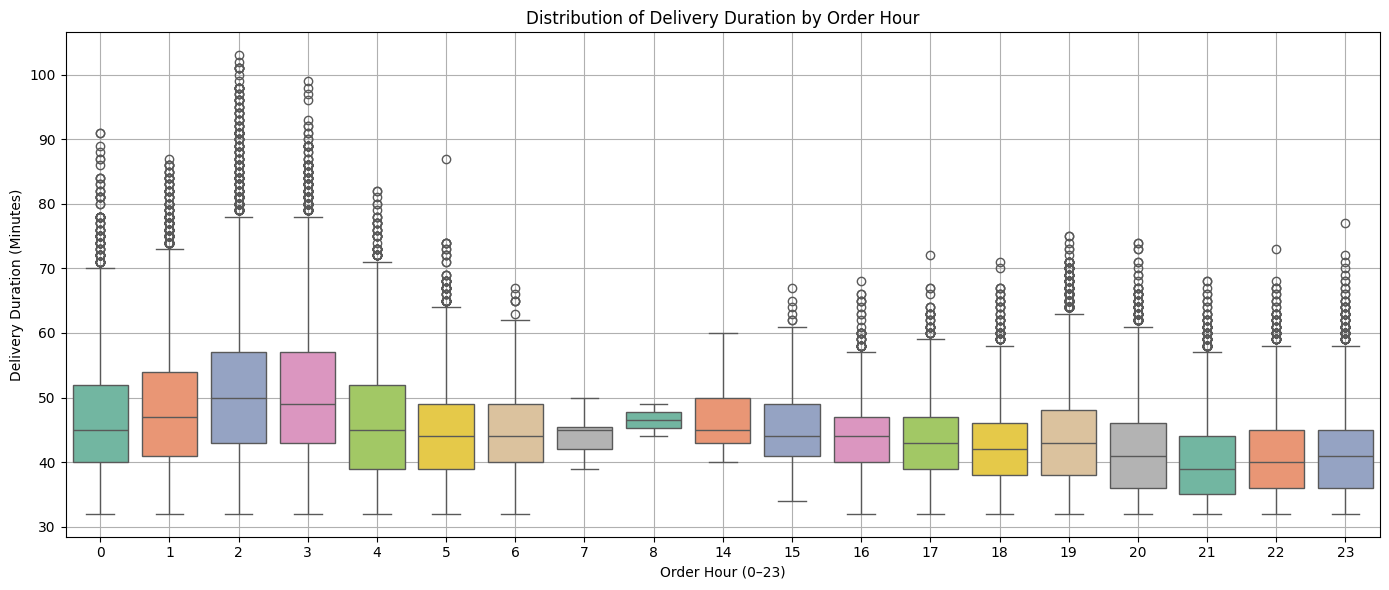

In [73]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(14, 6))
sns.boxplot(x=X_train['order_hour'], y=y_train, palette='Set2')
plt.title('Distribution of Delivery Duration by Order Hour')
plt.xlabel('Order Hour (0–23)')
plt.ylabel('Delivery Duration (Minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

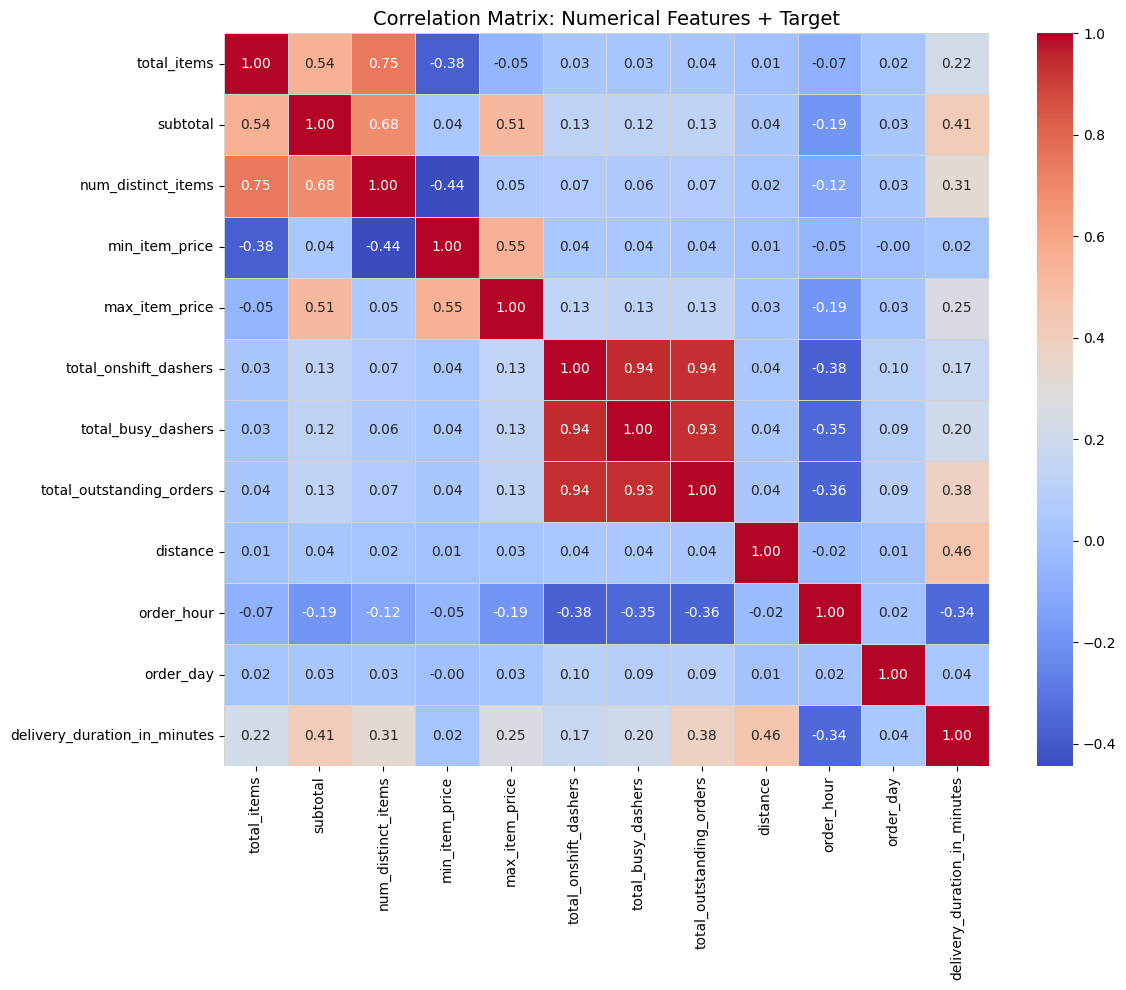

In [75]:
# Plot the heatmap of the correlation matrix

# Compute correlation matrix
df_corr_input = X_train[numerical_columns].copy()
df_corr_input['delivery_duration_in_minutes'] = y_train
corr_matrix = df_corr_input.corr()

# Plot heatmap with custom grid color
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.5,linecolor='lightgray')
plt.title("Correlation Matrix: Numerical Features + Target", fontsize=14)
plt.tight_layout()
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

Based on the above, the features with the weakest correlation with delivery_duration_in_minutes are:

min_item_price (Correlation: 0.02)

order_day (Correlation: 0.04)

total_onshift_dashers (Correlation: 0.17)

In [77]:
# Drop 3-5 weakly correlated columns from training dataset

drop_columnns = [
    'min_item_price',
    'order_day',
    'total_onshift_dashers'
]
X_train.drop(columns=drop_columnns, axis=1, inplace=True)


In [79]:
X_train.shape

(140621, 92)

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

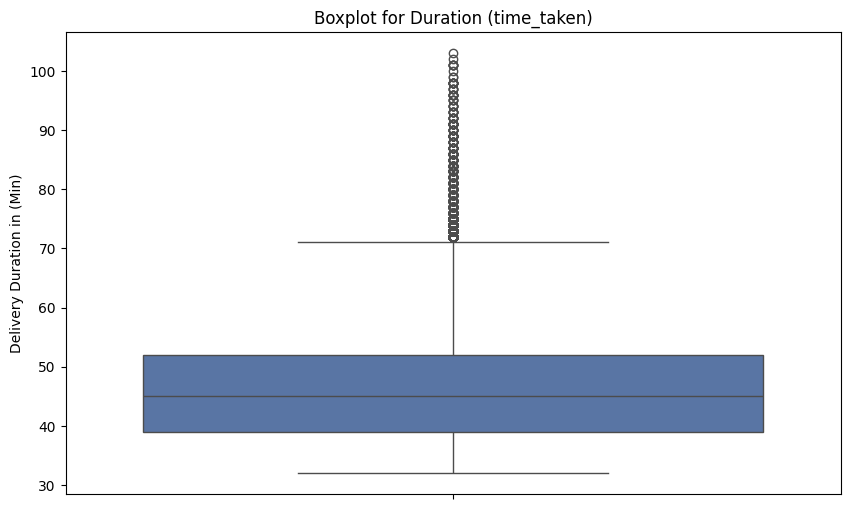

In [81]:
# Boxplot for time_taken

plt.figure(figsize=(10, 6))

# Boxplot for time_taken
sns.boxplot(y=y_train,  palette="deep")  
plt.title('Boxplot for Duration (time_taken)')
plt.ylabel('Delivery Duration in (Min)')

# Show plot
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

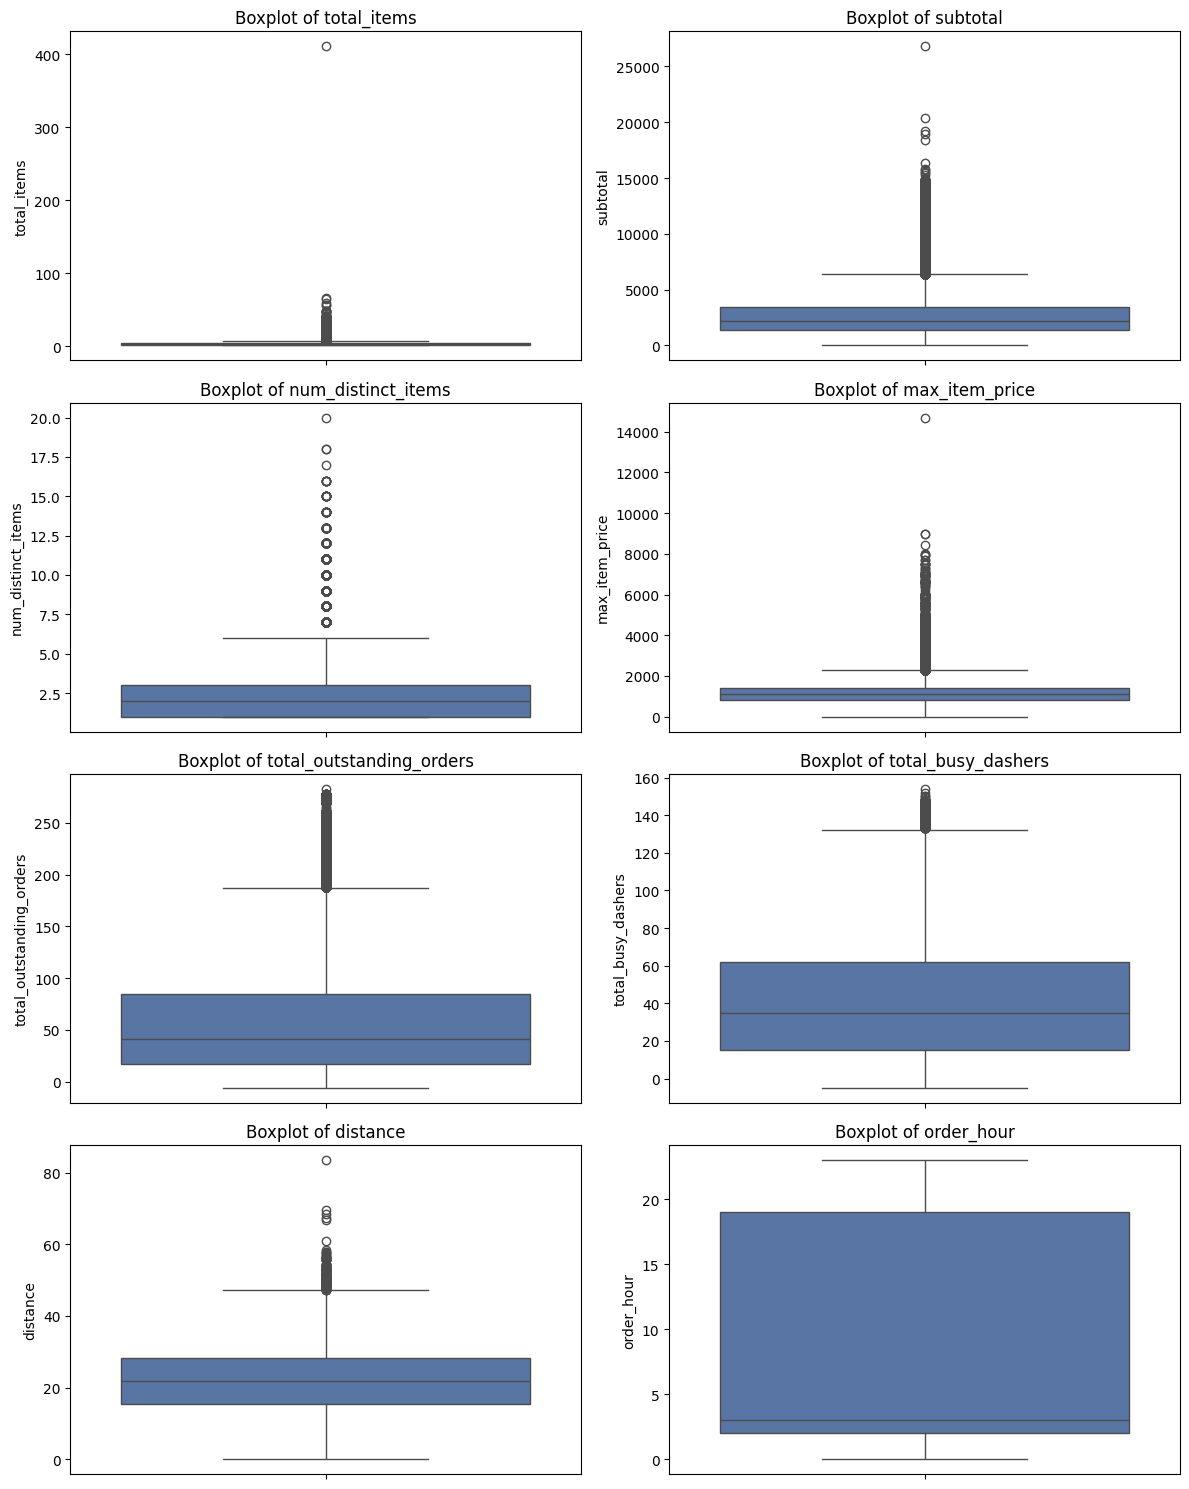

In [83]:
# Handle outliers

numerical_columns = [
    'total_items',
    'subtotal', 
    'num_distinct_items',
    'max_item_price',
    'total_outstanding_orders', 
    'total_busy_dashers',
    'distance',
    'order_hour'
    
]
# Combine numerical features with the target variable
features_to_plot = numerical_columns

# Create a combined DataFrame for plotting
plot_dataframe = X_train[numerical_columns].copy()

# Plot boxplots
plt.figure(figsize=(12,15))
for i, col in enumerate(features_to_plot):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(y=plot_dataframe[col], palette="deep")
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()



In [85]:
# Columns to apply outlier handling (features from X_train)
feature_handle_outliers = [
    'total_items',
    'subtotal', 
    'num_distinct_items',
    'max_item_price',
    'total_outstanding_orders', 
    'total_busy_dashers',
    'distance',
    'order_hour'
]

for col in feature_handle_outliers:
    # Calculate Q1, Q3, and IQR using X_TRAIN ONLY
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for capping
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply capping to the TRAINING data ONLY
    X_train[col] = np.where(
        X_train[col] < lower_bound,
        lower_bound,
        np.where(X_train[col] > upper_bound, upper_bound, X_train[col])
    )

    print(f"  Applied capping to {col} in X_train using bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")


# --- Handle Outliers in the Target Variable (y_train only) ---

print("\n")

print("Handling outliers for target variable (y_train): delivery_duration_in_minutes")

# Calculate Q1, Q3, and IQR for the target using Y_TRAIN ONLY
Q1_target = y_train.quantile(0.25)
Q3_target = y_train.quantile(0.75)
IQR_target = Q3_target - Q1_target

# Define the lower and upper bounds for capping the target
lower_bound_target = Q1_target - 1.5 * IQR_target
upper_bound_target = Q3_target + 1.5 * IQR_target

# Apply capping to the TRAINING target ONLY
y_train = np.where(
    y_train < lower_bound_target,
    lower_bound_target,
    np.where(y_train > upper_bound_target, upper_bound_target, y_train)
)

print(f"  Capping Applied to y_train using bounds: [{lower_bound_target:.2f}, {upper_bound_target:.2f}]")


# Convert the y_train numpy array back to a pandas Series if needed
y_train = pd.Series(y_train, name='delivery_duration_in_minutes')

print("Outlier handling complete for the training dataset.")

  Applied capping to total_items in X_train using bounds: [-1.00, 7.00]
  Applied capping to subtotal in X_train using bounds: [-1573.00, 6395.00]
  Applied capping to num_distinct_items in X_train using bounds: [-2.00, 6.00]
  Applied capping to max_item_price in X_train using bounds: [-95.00, 2289.00]
  Applied capping to total_outstanding_orders in X_train using bounds: [-85.00, 187.00]
  Applied capping to total_busy_dashers in X_train using bounds: [-55.50, 132.50]
  Applied capping to distance in X_train using bounds: [-3.88, 47.32]
  Applied capping to order_hour in X_train using bounds: [-23.50, 44.50]


Handling outliers for target variable (y_train): delivery_duration_in_minutes
  Capping Applied to y_train using bounds: [19.50, 71.50]
Outlier handling complete for the training dataset.


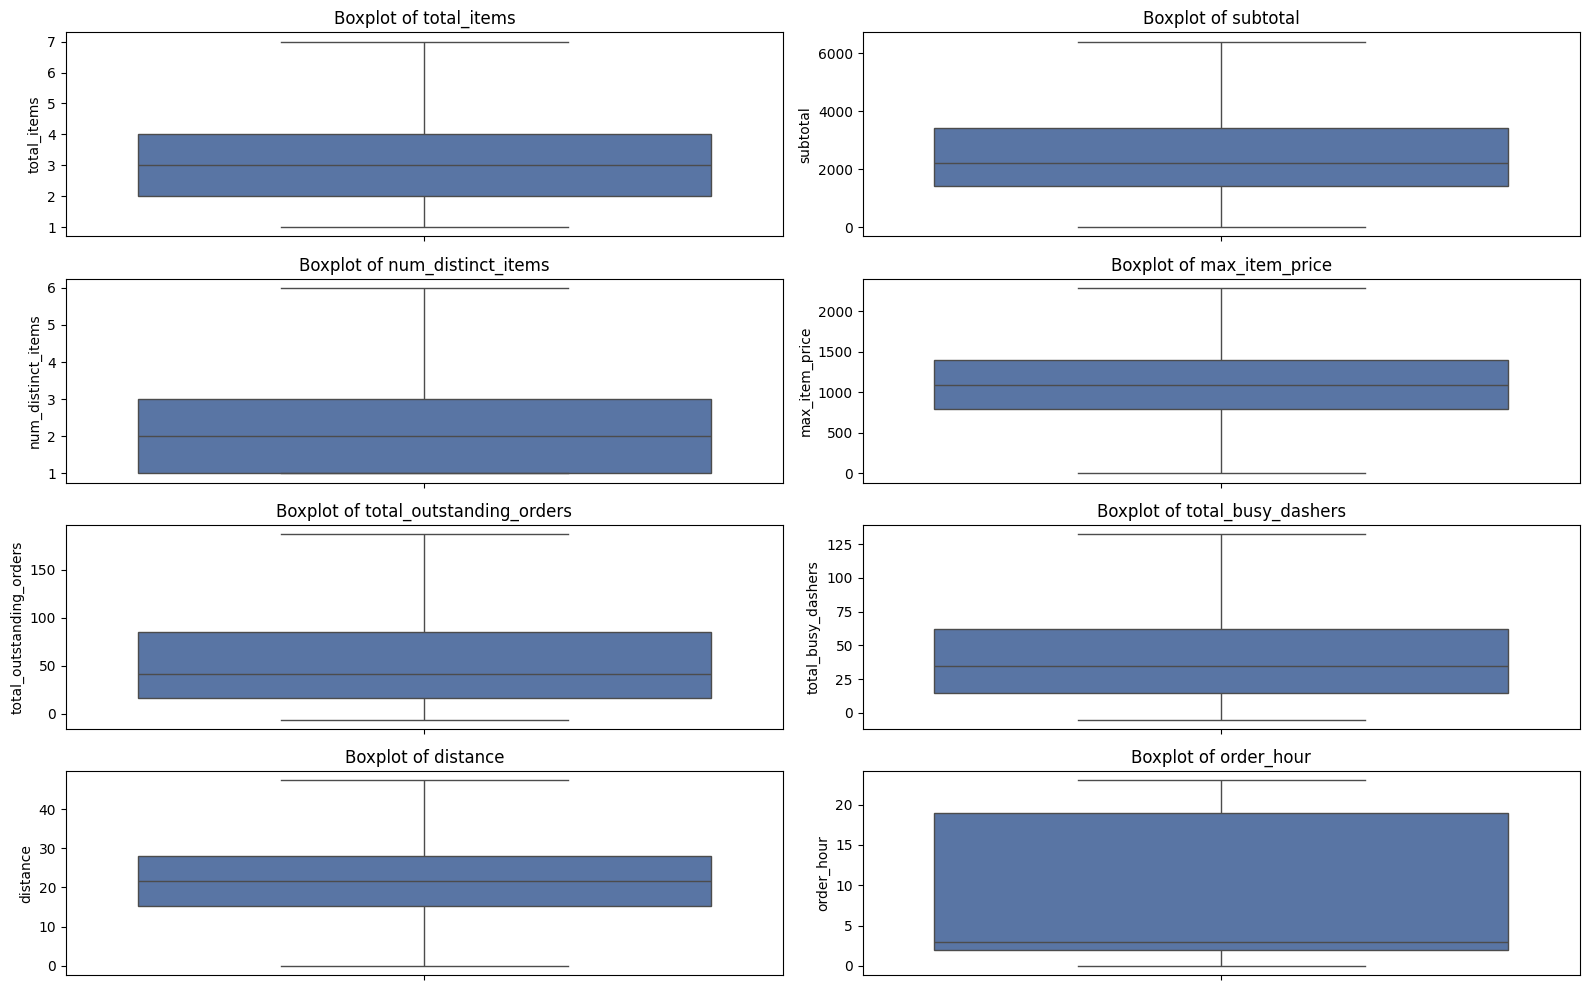

In [87]:
numerical_columns = [
    'total_items',
    'subtotal', 
    'num_distinct_items',
    'max_item_price',
    'total_outstanding_orders', 
    'total_busy_dashers',
    'distance',
    'order_hour'
]
# numerical features with the target variable
features_for_plot = numerical_columns

# Create a combined DF for plotting
df_plot = X_train[numerical_columns].copy()
## df_plot['delivery_duration_in_minutes'] = y_train

# Plot boxplots
plt.figure(figsize=(16, 10))
for i, col in enumerate(features_for_plot):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(y=df_plot[col], palette="deep")
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [92]:
# Define numerical and categorical columns for easy EDA and data manipulation


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [94]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [96]:
# Distribution of categorical columns


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [98]:
# Distribution of time_taken


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [100]:
# Scatter plot to visualise the relationship between time_taken and other features


#### **4.3** Drop the columns with weak correlations with the target variable

In [102]:
# Drop the weakly correlated columns from training dataset


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [89]:
# Import libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [91]:
# Apply scaling to the numerical columns

Scaling = MinMaxScaler()
numerical_columns_to_scale=[
    'total_items',
    'subtotal', 
    'num_distinct_items',
    'max_item_price',
    'total_outstanding_orders', 
    'total_busy_dashers',
    'distance',
    'order_hour']
X_train[numerical_columns_to_scale] = Scaling.fit_transform(X_train[numerical_columns_to_scale])

X_train.describe()

total_items       subtotal  num_distinct_items  max_item_price  \
count  140621.000000  140621.000000       140621.000000   140621.000000   
mean        0.335897       0.407665            0.322465        0.495573   
std         0.292687       0.239449            0.285306        0.202802   
min         0.000000       0.000000            0.000000        0.000000   
25%         0.166667       0.221267            0.000000        0.349061   
50%         0.333333       0.347146            0.200000        0.478375   
75%         0.500000       0.532760            0.400000        0.609436   
max         1.000000       1.000000            1.000000        1.000000   

       total_busy_dashers  total_outstanding_orders       distance  \
count       140621.000000             140621.000000  140621.000000   
mean             0.340596                  0.329325       0.461288   
std              0.233292                  0.262811       0.184555   
min              0.000000                  0.000000       0.000000   
25%              0.145455                  0.119171       0.323753   
50%              0.290909                  0.243523       0.459848   
75%              0.487273                  0.471503       0.594252   
max              1.000000                  1.000000       1.000000   

       market_id_2.0  market_id_3.0  market_id_4.0  ...  \
count  140621.000000   140621.00000  140621.000000  ...   
mean        0.305502        0.12016       0.263247  ...   
std         0.460621        0.32515       0.440397  ...   
min         0.000000        0.00000       0.000000  ...   
25%         0.000000        0.00000       0.000000  ...   
50%         0.000000        0.00000       0.000000  ...   
75%         1.000000        0.00000       1.000000  ...   
max         1.000000        1.00000       1.000000  ...   

       store_primary_category_71  store_primary_category_72  \
count              140621.000000              140621.000000   
mean                    0.004267                   0.031631   
std                     0.065181                   0.175017   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     0.000000                   0.000000   
max                     1.000000                   1.000000   

       order_protocol_2.0  order_protocol_3.0  order_protocol_4.0  \
count       140621.000000       140621.000000       140621.000000   
mean             0.119413            0.268182            0.097553   
std              0.324275            0.443014            0.296710   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            1.000000            0.000000   
max              1.000000            1.000000            1.000000   

       order_protocol_5.0  order_protocol_6.0  order_protocol_7.0  \
count       140621.000000       140621.000000       140621.000000   
mean             0.235918            0.003769            0.000114   
std              0.424573            0.061277            0.010666   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max              1.000000            1.000000            1.000000   

          order_hour      isWeekend  
count  140621.000000  140621.000000  
mean        0.368407       0.345482  
std         0.377256       0.475527  
min         0.000000       0.000000  
25%         0.086957       0.000000  
50%         0.130435       0.000000  
75%         0.826087       1.000000  
max         1.000000       1.000000  

[8 rows x 92 co

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [93]:
# Create/Initialise the model

X_train_l1 = sm.add_constant(X_train[['distance']].reset_index(drop=True))
y_train_aligned = y_train.reset_index(drop=True)

# Fit the model
l1 = sm.OLS(y_train_aligned, X_train_l1).fit()

In [95]:
l1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     delivery_duration_in_minutes   R-squared:                       0.216
Model:                                      OLS   Adj. R-squared:                  0.216
Method:                           Least Squares   F-statistic:                 3.879e+04
Date:                          Mon, 23 Jun 2025   Prob (F-statistic):               0.00
Time:                                  21:24:17   Log-Likelihood:            -4.9323e+05
No. Observations:                        140621   AIC:                         9.865e+05
Df Residuals:                            140619   BIC:                         9.865e+05
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.5291      0.058    612.983      0.000      35.416      35.643
distance      22.9763      0.117    196.951      0.000      22.748      23.205
==============================================================================
Omnibus:                     9062.095   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10905.379
Skew:                           0.672   Prob(JB):                         0.00
Kurtosis:                       3.237   Cond. No.                         6.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
# Create/Initialise the model with distance and subtotal


X_train_l2 = sm.add_constant(X_train[['distance','subtotal']].reset_index(drop=True))
# Fit the model
l2 = sm.OLS(y_train_aligned, X_train_l2).fit()
l2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     delivery_duration_in_minutes   R-squared:                       0.377
Model:                                      OLS   Adj. R-squared:                  0.377
Method:                           Least Squares   F-statistic:                 4.260e+04
Date:                          Mon, 23 Jun 2025   Prob (F-statistic):               0.00
Time:                                  21:24:20   Log-Likelihood:            -4.7706e+05
No. Observations:                        140621   AIC:                         9.541e+05
Df Residuals:                            140618   BIC:                         9.542e+05
Df Model:                                     2                                         
Covariance Type:                      nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.6496      0.060    492.833      0.000      29.532      29.768
distance      22.2033      0.104    213.364      0.000      21.999      22.407
subtotal      15.2970      0.080    190.721      0.000      15.140      15.454
==============================================================================
Omnibus:                    10192.838   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13074.122
Skew:                           0.665   Prob(JB):                         0.00
Kurtosis:                       3.680   Cond. No.                         7.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
# Create/Initialise the model with distance, subtotal and total_outstanding_orders

X_train_l3 = sm.add_constant(X_train[['distance','subtotal','total_outstanding_orders']].reset_index(drop=True))
# Fit the model
l3 = sm.OLS(y_train_aligned, X_train_l3).fit()

l3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     delivery_duration_in_minutes   R-squared:                       0.468
Model:                                      OLS   Adj. R-squared:                  0.468
Method:                           Least Squares   F-statistic:                 4.116e+04
Date:                          Mon, 23 Jun 2025   Prob (F-statistic):               0.00
Time:                                  21:24:24   Log-Likelihood:            -4.6605e+05
No. Observations:                        140621   AIC:                         9.321e+05
Df Residuals:                            140617   BIC:                         9.321e+05
Df Model:                                     3                                         
Covariance Type:                      nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       27.1004      0.058    467.001      0.000      26.987      27.214
distance                    21.7092      0.096    225.478      0.000      21.521      21.898
subtotal                    13.5887      0.075    181.211      0.000      13.442      13.736
total_outstanding_orders    10.5474      0.068    154.378      0.000      10.413      10.681
==============================================================================
Omnibus:                     3627.030   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3948.997
Skew:                           0.390   Prob(JB):                         0.00
Kurtosis:                       3.255   Cond. No.                         7.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
# Create/Initialise the model with distance, subtotal, total_outstanding_orders and order_hour


X_train_l4 = sm.add_constant(X_train[['distance','subtotal','total_outstanding_orders','order_hour']].reset_index(drop=True))
# Fit the model
l4 = sm.OLS(y_train_aligned, X_train_l4).fit()

l4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     delivery_duration_in_minutes   R-squared:                       0.494
Model:                                      OLS   Adj. R-squared:                  0.494
Method:                           Least Squares   F-statistic:                 3.431e+04
Date:                          Mon, 23 Jun 2025   Prob (F-statistic):               0.00
Time:                                  21:24:26   Log-Likelihood:            -4.6248e+05
No. Observations:                        140621   AIC:                         9.250e+05
Df Residuals:                            140616   BIC:                         9.250e+05
Df Model:                                     4                                         
Covariance Type:                      nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       29.8395      0.065    459.141      0.000      29.712      29.967
distance                    21.6789      0.094    230.957      0.000      21.495      21.863
subtotal                    12.4840      0.074    168.166      0.000      12.338      12.629
total_outstanding_orders     8.4369      0.071    118.797      0.000       8.298       8.576
order_hour                  -4.2879      0.050    -85.637      0.000      -4.386      -4.190
==============================================================================
Omnibus:                     2102.254   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2258.558
Skew:                           0.281   Prob(JB):                         0.00
Kurtosis:                       3.264   Cond. No.                         7.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
# Create/Initialise the model with distance, subtotal, total_outstanding_orders, order_hour and num_distinct_items

X_train_l5 = sm.add_constant(X_train[['distance','subtotal','total_outstanding_orders','order_hour','num_distinct_items']].reset_index(drop=True))
# Fit the model
l5 = sm.OLS(y_train_aligned, X_train_l5).fit()
l5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     delivery_duration_in_minutes   R-squared:                       0.497
Model:                                      OLS   Adj. R-squared:                  0.497
Method:                           Least Squares   F-statistic:                 2.775e+04
Date:                          Mon, 23 Jun 2025   Prob (F-statistic):               0.00
Time:                                  21:24:30   Log-Likelihood:            -4.6210e+05
No. Observations:                        140621   AIC:                         9.242e+05
Df Residuals:                            140615   BIC:                         9.243e+05
Df Model:                                     5                                         
Covariance Type:                      nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       29.8357      0.065    460.310      0.000      29.709      29.963
distance                    21.6838      0.094    231.628      0.000      21.500      21.867
subtotal                    10.6813      0.099    107.980      0.000      10.487      10.875
total_outstanding_orders     8.4927      0.071    119.854      0.000       8.354       8.632
order_hour                  -4.3000      0.050    -86.106      0.000      -4.398      -4.202
num_distinct_items           2.2405      0.082     27.479      0.000       2.081       2.400
==============================================================================
Omnibus:                     2174.711   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2358.298
Skew:                           0.282   Prob(JB):                         0.00
Kurtosis:                       3.290   Cond. No.                         9.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:

# Create/Initialise the model with distance, subtotal, total_outstanding_orders, order_hour, num_distinct_items, max_item_price

X_train_l6 = sm.add_constant(X_train[['distance','subtotal','total_outstanding_orders','order_hour','num_distinct_items','max_item_price']].reset_index(drop=True))
# Fit the model 
l6 = sm.OLS(y_train_aligned, X_train_l6).fit()
l6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     delivery_duration_in_minutes   R-squared:                       0.497
Model:                                      OLS   Adj. R-squared:                  0.497
Method:                           Least Squares   F-statistic:                 2.317e+04
Date:                          Mon, 23 Jun 2025   Prob (F-statistic):               0.00
Time:                                  21:24:33   Log-Likelihood:            -4.6202e+05
No. Observations:                        140621   AIC:                         9.241e+05
Df Residuals:                            140614   BIC:                         9.241e+05
Df Model:                                     6                                         
Covariance Type:                      nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       29.3699      0.075    393.010      0.000      29.223      29.516
distance                    21.6751      0.094    231.656      0.000      21.492      21.858
subtotal                     9.5285      0.135     70.478      0.000       9.263       9.793
total_outstanding_orders     8.4535      0.071    119.249      0.000       8.315       8.592
order_hour                  -4.2393      0.050    -84.538      0.000      -4.338      -4.141
num_distinct_items           2.8285      0.094     30.061      0.000       2.644       3.013
max_item_price               1.4947      0.120     12.501      0.000       1.260       1.729
==============================================================================
Omnibus:                     2183.442   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2366.396
Skew:                           0.283   Prob(JB):                         0.00
Kurtosis:                       3.288   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
# Create/Initialise the model with distance, subtotal, total_outstanding_orders, order_hour, num_distinct_items, max_item_price, total_items

X_train_l7 = sm.add_constant(X_train[['distance','subtotal','total_outstanding_orders','order_hour','num_distinct_items','max_item_price','total_items']].reset_index(drop=True))
# Fit the model
l7 = sm.OLS(y_train_aligned, X_train_l7).fit()
l7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     delivery_duration_in_minutes   R-squared:                       0.497
Model:                                      OLS   Adj. R-squared:                  0.497
Method:                           Least Squares   F-statistic:                 1.986e+04
Date:                          Mon, 23 Jun 2025   Prob (F-statistic):               0.00
Time:                                  21:24:36   Log-Likelihood:            -4.6202e+05
No. Observations:                        140621   AIC:                         9.241e+05
Df Residuals:                            140613   BIC:                         9.241e+05
Df Model:                                     7                                         
Covariance Type:                      nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       29.4228      0.078    378.905      0.000      29.271      29.575
distance                    21.6723      0.094    231.614      0.000      21.489      21.856
subtotal                     9.7141      0.154     63.016      0.000       9.412      10.016
total_outstanding_orders     8.4522      0.071    119.229      0.000       8.313       8.591
order_hour                  -4.2397      0.050    -84.548      0.000      -4.338      -4.141
num_distinct_items           3.0958      0.142     21.764      0.000       2.817       3.375
max_item_price               1.3322      0.136      9.794      0.000       1.066       1.599
total_items                 -0.3939      0.157     -2.506      0.012      -0.702      -0.086
==============================================================================
Omnibus:                     2183.303   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2366.210
Skew:                           0.283   Prob(JB):                         0.00
Kurtosis:                       3.288   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:

# Create/Initialise the model with distance, subtotal, total_outstanding_orders, order_hour, num_distinct_items, max_item_price

X_train_l6 = sm.add_constant(X_train[['distance','subtotal','total_outstanding_orders','order_hour','num_distinct_items','max_item_price']].reset_index(drop=True))
# Fit the model 
l6 = sm.OLS(y_train_aligned, X_train_l6).fit()
l6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     delivery_duration_in_minutes   R-squared:                       0.497
Model:                                      OLS   Adj. R-squared:                  0.497
Method:                           Least Squares   F-statistic:                 2.317e+04
Date:                          Mon, 23 Jun 2025   Prob (F-statistic):               0.00
Time:                                  21:24:38   Log-Likelihood:            -4.6202e+05
No. Observations:                        140621   AIC:                         9.241e+05
Df Residuals:                            140614   BIC:                         9.241e+05
Df Model:                                     6                                         
Covariance Type:                      nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       29.3699      0.075    393.010      0.000      29.223      29.516
distance                    21.6751      0.094    231.656      0.000      21.492      21.858
subtotal                     9.5285      0.135     70.478      0.000       9.263       9.793
total_outstanding_orders     8.4535      0.071    119.249      0.000       8.315       8.592
order_hour                  -4.2393      0.050    -84.538      0.000      -4.338      -4.141
num_distinct_items           2.8285      0.094     30.061      0.000       2.644       3.013
max_item_price               1.4947      0.120     12.501      0.000       1.260       1.729
==============================================================================
Omnibus:                     2183.442   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2366.396
Skew:                           0.283   Prob(JB):                         0.00
Kurtosis:                       3.288   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
# Create/Initialise the model with distance, subtotal, total_outstanding_orders, order_hour, num_distinct_items, max_item_price, total_items, total_busy_dashers


X_train_l8 = sm.add_constant(X_train[['distance','subtotal','total_outstanding_orders','order_hour','num_distinct_items','max_item_price','total_items','total_busy_dashers']].reset_index(drop=True))
# Fit the model
l8 = sm.OLS(y_train_aligned, X_train_l8).fit()
l8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     delivery_duration_in_minutes   R-squared:                       0.678
Model:                                      OLS   Adj. R-squared:                  0.678
Method:                           Least Squares   F-statistic:                 3.700e+04
Date:                          Sun, 22 Jun 2025   Prob (F-statistic):               0.00
Time:                                  21:25:44   Log-Likelihood:            -4.3069e+05
No. Observations:                        140621   AIC:                         8.614e+05
Df Residuals:                            140612   BIC:                         8.615e+05
Df Model:                                     8                                         
Covariance Type:                      nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       32.4078      0.063    514.022      0.000      32.284      32.531
distance                    22.0587      0.075    294.516      0.000      21.912      22.205
subtotal                     9.6474      0.123     78.200      0.000       9.406       9.889
total_outstanding_orders    47.7826      0.151    316.325      0.000      47.486      48.079
order_hour                  -4.4498      0.040   -110.860      0.000      -4.528      -4.371
num_distinct_items           2.7674      0.114     24.308      0.000       2.544       2.991
max_item_price               1.7763      0.109     16.317      0.000       1.563       1.990
total_items                 -0.2545      0.126     -2.023      0.043      -0.501      -0.008
total_busy_dashers         -47.4820      0.169   -280.939      0.000     -47.813     -47.151
==============================================================================
Omnibus:                     4955.356   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9359.557
Skew:                           0.275   Prob(JB):                         0.00
Kurtosis:                       4.137   Cond. No.                         24.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
# Create/Initialise the model with distance, subtotal, total_outstanding_orders, order_hour, num_distinct_items, max_item_price, total_items, total_busy_dashers, isWeekend

X_train_l9 = sm.add_constant(X_train[['distance','subtotal','total_outstanding_orders','order_hour','num_distinct_items','max_item_price','total_items','total_busy_dashers','isWeekend']].reset_index(drop=True))
# Fit the model
l9 = sm.OLS(y_train_aligned, X_train_l9).fit()
l9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     delivery_duration_in_minutes   R-squared:                       0.689
Model:                                      OLS   Adj. R-squared:                  0.689
Method:                           Least Squares   F-statistic:                 3.458e+04
Date:                          Mon, 23 Jun 2025   Prob (F-statistic):               0.00
Time:                                  21:24:46   Log-Likelihood:            -4.2829e+05
No. Observations:                        140621   AIC:                         8.566e+05
Df Residuals:                            140611   BIC:                         8.567e+05
Df Model:                                     9                                         
Covariance Type:                      nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       32.0862      0.062    516.259      0.000      31.964      32.208
distance                    22.0441      0.074    299.386      0.000      21.900      22.188
subtotal                     9.6483      0.121     79.553      0.000       9.411       9.886
total_outstanding_orders    47.6485      0.149    320.840      0.000      47.357      47.940
order_hour                  -4.6007      0.040   -116.417      0.000      -4.678      -4.523
num_distinct_items           2.6862      0.112     24.000      0.000       2.467       2.906
max_item_price               1.5916      0.107     14.867      0.000       1.382       1.801
total_items                 -0.3449      0.124     -2.788      0.005      -0.587      -0.102
total_busy_dashers         -47.8319      0.166   -287.750      0.000     -48.158     -47.506
isWeekend                    2.0115      0.029     69.878      0.000       1.955       2.068
==============================================================================
Omnibus:                     6255.578   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12710.673
Skew:                           0.320   Prob(JB):                         0.00
Kurtosis:                       4.326   Cond. No.                         25.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
# Create/Initialise the model with distance, subtotal, total_outstanding_orders, order_hour, num_distinct_items, max_item_price, total_items, total_busy_dashers, isWeekend, market_id_2.0

X_train_l10 = sm.add_constant(X_train[['distance','subtotal','total_outstanding_orders','order_hour','num_distinct_items','max_item_price','total_items','total_busy_dashers','isWeekend','market_id_2.0']].reset_index(drop=True))
# Fit the model
l10 = sm.OLS(y_train_aligned, X_train_l10).fit()
l10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     delivery_duration_in_minutes   R-squared:                       0.707
Model:                                      OLS   Adj. R-squared:                  0.707
Method:                           Least Squares   F-statistic:                 3.390e+04
Date:                          Mon, 23 Jun 2025   Prob (F-statistic):               0.00
Time:                                  21:24:56   Log-Likelihood:            -4.2409e+05
No. Observations:                        140621   AIC:                         8.482e+05
Df Residuals:                            140610   BIC:                         8.483e+05
Df Model:                                    10                                         
Covariance Type:                      nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       32.0345      0.060    531.054      0.000      31.916      32.153
distance                    22.3706      0.072    312.670      0.000      22.230      22.511
subtotal                     9.3180      0.118     79.127      0.000       9.087       9.549
total_outstanding_orders    47.5201      0.144    329.675      0.000      47.238      47.803
order_hour                  -4.1631      0.039   -107.738      0.000      -4.239      -4.087
num_distinct_items           2.5539      0.109     23.509      0.000       2.341       2.767
max_item_price               1.6353      0.104     15.739      0.000       1.432       1.839
total_items                 -0.1641      0.120     -1.367      0.172      -0.399       0.071
total_busy_dashers         -45.5667      0.163   -279.288      0.000     -45.886     -45.247
isWeekend                    1.9426      0.028     69.510      0.000       1.888       1.997
market_id_2.0               -2.8499      0.031    -93.109      0.000      -2.910      -2.790
==============================================================================
Omnibus:                     6374.212   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13304.773
Skew:                           0.318   Prob(JB):                         0.00
Kurtosis:                       4.366   Cond. No.                         25.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
# Create/Initialise the model with distance, subtotal, total_outstanding_orders, order_hour, num_distinct_items, max_item_price, total_items, total_busy_dashers, isWeekend, market_id_2.0, order_protocol_5.0

X_train_l11 = sm.add_constant(X_train[['distance','subtotal','total_outstanding_orders','order_hour','num_distinct_items','max_item_price','total_items','total_busy_dashers','isWeekend','market_id_2.0','order_protocol_5.0']].reset_index(drop=True))
# Fit the model
l11 = sm.OLS(y_train_aligned, X_train_l11).fit()
l11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     delivery_duration_in_minutes   R-squared:                       0.715
Model:                                      OLS   Adj. R-squared:                  0.714
Method:                           Least Squares   F-statistic:                 3.199e+04
Date:                          Sun, 22 Jun 2025   Prob (F-statistic):               0.00
Time:                                  21:25:54   Log-Likelihood:            -4.2222e+05
No. Observations:                        140621   AIC:                         8.445e+05
Df Residuals:                            140609   BIC:                         8.446e+05
Df Model:                                    11                                         
Covariance Type:                      nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       32.4084      0.060    541.598      0.000      32.291      32.526
distance                    22.2559      0.071    315.105      0.000      22.117      22.394
subtotal                     9.7076      0.116     83.411      0.000       9.480       9.936
total_outstanding_orders    47.5471      0.142    334.261      0.000      47.268      47.826
order_hour                  -4.0999      0.038   -107.478      0.000      -4.175      -4.025
num_distinct_items           2.5145      0.107     23.454      0.000       2.304       2.725
max_item_price               1.3994      0.103     13.638      0.000       1.198       1.600
total_items                 -0.4630      0.119     -3.905      0.000      -0.695      -0.231
total_busy_dashers         -45.1252      0.161   -279.992      0.000     -45.441     -44.809
isWeekend                    1.9252      0.028     69.802      0.000       1.871       1.979
market_id_2.0               -2.7726      0.030    -91.713      0.000      -2.832      -2.713
order_protocol_5.0          -1.9071      0.031    -61.458      0.000      -1.968      -1.846
==============================================================================
Omnibus:                     7244.851   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14742.111
Skew:                           0.368   Prob(JB):                         0.00
Kurtosis:                       4.405   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
# Create/Initialise the model with distance, subtotal, total_outstanding_orders, order_hour, num_distinct_items, max_item_price, total_items, total_busy_dashers, isWeekend, market_id_2.0, order_protocol_5.0, market_id_2.0

X_train_l12 = sm.add_constant(X_train[['distance','subtotal','total_outstanding_orders','order_hour','num_distinct_items','max_item_price','total_items','total_busy_dashers','isWeekend','order_protocol_5.0','order_protocol_2.0','market_id_2.0']].reset_index(drop=True))
# Fit the model
l12 = sm.OLS(y_train_aligned, X_train_l12).fit()
l12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     delivery_duration_in_minutes   R-squared:                       0.715
Model:                                      OLS   Adj. R-squared:                  0.715
Method:                           Least Squares   F-statistic:                 2.933e+04
Date:                          Mon, 23 Jun 2025   Prob (F-statistic):               0.00
Time:                                  21:25:04   Log-Likelihood:            -4.2222e+05
No. Observations:                        140621   AIC:                         8.445e+05
Df Residuals:                            140608   BIC:                         8.446e+05
Df Model:                                    12                                         
Covariance Type:                      nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       32.4232      0.060    539.992      0.000      32.306      32.541
distance                    22.2608      0.071    315.098      0.000      22.122      22.399
subtotal                     9.7209      0.116     83.466      0.000       9.493       9.949
total_outstanding_orders    47.5510      0.142    334.283      0.000      47.272      47.830
order_hour                  -4.0948      0.038   -107.241      0.000      -4.170      -4.020
num_distinct_items           2.5137      0.107     23.447      0.000       2.304       2.724
max_item_price               1.3878      0.103     13.516      0.000       1.187       1.589
total_items                 -0.4706      0.119     -3.968      0.000      -0.703      -0.238
total_busy_dashers         -45.1192      0.161   -279.941      0.000     -45.435     -44.803
isWeekend                    1.9237      0.028     69.740      0.000       1.870       1.978
order_protocol_5.0          -1.9273      0.032    -60.676      0.000      -1.990      -1.865
order_protocol_2.0          -0.1221      0.041     -2.970      0.003      -0.203      -0.042
market_id_2.0               -2.7703      0.030    -91.606      0.000      -2.830      -2.711
==============================================================================
Omnibus:                     7233.392   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14723.492
Skew:                           0.367   Prob(JB):                         0.00
Kurtosis:                       4.405   Cond. No.                         26.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
# Create/Initialise the model with distance, subtotal, total_outstanding_orders, order_hour, num_distinct_items, max_item_price, total_items, total_busy_dashers, isWeekend, market_id_2.0, order_protocol_5.0, market_id_2.0, market_id_3.0

X_train_l13 = sm.add_constant(X_train[['distance','subtotal','total_outstanding_orders','order_hour','num_distinct_items','max_item_price','total_items','total_busy_dashers','isWeekend','order_protocol_5.0','order_protocol_2.0','market_id_2.0','market_id_3.0']].reset_index(drop=True))
# Fit the model
l13 = sm.OLS(y_train_aligned, X_train_l13).fit()
l13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     delivery_duration_in_minutes   R-squared:                       0.718
Model:                                      OLS   Adj. R-squared:                  0.718
Method:                           Least Squares   F-statistic:                 2.753e+04
Date:                          Mon, 23 Jun 2025   Prob (F-statistic):               0.00
Time:                                  21:25:08   Log-Likelihood:            -4.2138e+05
No. Observations:                        140621   AIC:                         8.428e+05
Df Residuals:                            140607   BIC:                         8.429e+05
Df Model:                                    13                                         
Covariance Type:                      nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       32.9693      0.061    539.204      0.000      32.849      33.089
distance                    22.2854      0.070    317.327      0.000      22.148      22.423
subtotal                     9.7957      0.116     84.602      0.000       9.569      10.023
total_outstanding_orders    47.2828      0.142    334.036      0.000      47.005      47.560
order_hour                  -4.2183      0.038   -110.792      0.000      -4.293      -4.144
num_distinct_items           2.5055      0.107     23.511      0.000       2.297       2.714
max_item_price               1.2892      0.102     12.627      0.000       1.089       1.489
total_items                 -0.5229      0.118     -4.435      0.000      -0.754      -0.292
total_busy_dashers         -45.4602      0.160   -283.369      0.000     -45.775     -45.146
isWeekend                    1.9658      0.027     71.642      0.000       1.912       2.020
order_protocol_5.0          -1.9646      0.032    -62.196      0.000      -2.027      -1.903
order_protocol_2.0          -0.1717      0.041     -4.201      0.000      -0.252      -0.092
market_id_2.0               -2.9659      0.030    -97.451      0.000      -3.026      -2.906
market_id_3.0               -1.7381      0.042    -41.137      0.000      -1.821      -1.655
==============================================================================
Omnibus:                     6795.279   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14920.242
Skew:                           0.322   Prob(JB):                         0.00
Kurtosis:                       4.460   Cond. No.                         26.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
# Create/Initialise the model with distance, subtotal, total_outstanding_orders, order_hour, num_distinct_items, max_item_price, total_items, total_busy_dashers, isWeekend, market_id_2.0, order_protocol_5.0, market_id_2.0, market_id_3.0, market_id_4.0, market_id_5.0

X_train_l15 = sm.add_constant(X_train[['distance','subtotal','total_outstanding_orders','order_hour','num_distinct_items','max_item_price','total_items','total_busy_dashers','isWeekend','order_protocol_5.0','order_protocol_2.0','market_id_2.0','market_id_3.0','market_id_4.0', 'market_id_5.0', 'market_id_6.0']].reset_index(drop=True))
# Fit the model
l15 = sm.OLS(y_train_aligned, X_train_l15).fit()
l15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     delivery_duration_in_minutes   R-squared:                       0.754
Model:                                      OLS   Adj. R-squared:                  0.754
Method:                           Least Squares   F-statistic:                 2.694e+04
Date:                          Mon, 23 Jun 2025   Prob (F-statistic):               0.00
Time:                                  21:25:11   Log-Likelihood:            -4.1174e+05
No. Observations:                        140621   AIC:                         8.235e+05
Df Residuals:                            140604   BIC:                         8.237e+05
Df Model:                                    16                                         
Covariance Type:                      nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       34.7269      0.059    586.448      0.000      34.611      34.843
distance                    22.6530      0.066    345.159      0.000      22.524      22.782
subtotal                     9.4115      0.108     86.989      0.000       9.199       9.624
total_outstanding_orders    48.1693      0.132    363.984      0.000      47.910      48.429
order_hour                  -3.5295      0.036    -97.562      0.000      -3.600      -3.459
num_distinct_items           2.6983      0.100     27.113      0.000       2.503       2.893
max_item_price               1.4177      0.095     14.870      0.000       1.231       1.605
total_items                 -0.4906      0.110     -4.456      0.000      -0.706      -0.275
total_busy_dashers         -42.9440      0.152   -282.148      0.000     -43.242     -42.646
isWeekend                    1.8046      0.026     70.260      0.000       1.754       1.855
order_protocol_5.0          -1.9905      0.030    -67.352      0.000      -2.048      -1.933
order_protocol_2.0           0.2678      0.038      6.991      0.000       0.193       0.343
market_id_2.0               -6.6710      0.039   -173.261      0.000      -6.747      -6.596
market_id_3.0               -4.4125      0.044   -100.720      0.000      -4.498      -4.327
market_id_4.0               -5.3492      0.039   -135.927      0.000      -5.426      -5.272
market_id_5.0               -4.3710      0.047    -93.015      0.000      -4.463      -4.279
market_id_6.0               -3.6136      0.203    -17.817      0.000      -4.011      -3.216
==============================================================================
Omnibus:                     5809.788   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14791.046
Skew:                           0.216   Prob(JB):                         0.00
Kurtosis:                       4.529   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
# Train the model using the training data

X_test = X_test.reset_index(drop=True)
y_test= y_test.reset_index(drop=True)

numerical_columns_scaled=[
    'total_items',
    'subtotal', 
    'num_distinct_items',
    'max_item_price',
    'total_outstanding_orders', 
    'total_busy_dashers',
    'distance',
    'order_hour']
X_test[numerical_columns_scaled] = Scaling.transform(X_test[numerical_columns_scaled])

X_test.describe()


total_items      subtotal  num_distinct_items  min_item_price  \
count  35156.000000  35156.000000        35156.000000    35156.000000   
mean       0.367908      0.421765            0.336221      683.051769   
std        0.414581      0.284988            0.326193      510.614899   
min        0.000000      0.000000            0.000000      -86.000000   
25%        0.166667      0.219547            0.000000      299.000000   
50%        0.333333      0.349961            0.200000      595.000000   
75%        0.500000      0.534011            0.400000      942.000000   
max        8.333333      3.518374            3.600000     6889.000000   

       max_item_price  total_onshift_dashers  total_busy_dashers  \
count    35156.000000           35156.000000        35156.000000   
mean         0.505859              44.806349            0.341032   
std          0.239148              34.499584            0.234708   
min          0.000000              -2.000000            0.036364   
25%          0.349061              17.000000            0.145455   
50%          0.478375              37.000000            0.283636   
75%          0.609436              65.000000            0.494545   
max          3.713412             164.000000            1.141818   

       total_outstanding_orders      distance  market_id_2.0  ...  \
count              35156.000000  35156.000000   35156.000000  ...   
mean                   0.332799      0.462390       0.298925  ...   
std                    0.274481      0.184585       0.457793  ...   
min                    0.000000      0.000000       0.000000  ...   
25%                    0.119171      0.324598       0.000000  ...   
50%                    0.243523      0.461538       0.000000  ...   
75%                    0.471503      0.595097       1.000000  ...   
max                    1.507772      1.307692       1.000000  ...   

       store_primary_category_72  order_protocol_2.0  order_protocol_3.0  \
count               35156.000000        35156.000000        35156.000000   
mean                    0.031915            0.116566            0.267749   
std                     0.175776            0.320907            0.442793   
min                     0.000000            0.000000            0.000000   
25%                     0.000000            0.000000            0.000000   
50%                     0.000000            0.000000            0.000000   
75%                     0.000000            0.000000            1.000000   
max                     1.000000            1.000000            1.000000   

       order_protocol_4.0  order_protocol_5.0  order_protocol_6.0  \
count        35156.000000        35156.000000        35156.000000   
mean             0.100353            0.234384            0.004210   
std              0.300474            0.423619            0.064747   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max              1.000000            1.000000            1.000000   

       order_protocol_7.0    order_hour     order_day     isWeekend  
count        35156.000000  35156.000000  35156.000000  35156.000000  
mean             0.000085      0.368424      3.213932      0.346143  
std              0.009237      0.377244      2.052435      0.475746  
min              0.000000      0.000000      0.000000      0.000000  
25%              0.000000      0.086957      1.000000      0.000000  
50%              0.000000      0.130435      3.000000      0.000000  
75%              0.000000      0.826087      5.000000      1.000000  
max              1.000000      1.000000      6.000000      1.000000  

[8 rows x 95 columns]

In [123]:
X_test_trmdl = sm.add_constant(X_test[['distance','subtotal','total_outstanding_orders','order_hour','num_distinct_items','max_item_price','total_items','total_busy_dashers','isWeekend','order_protocol_5.0','order_protocol_2.0','market_id_2.0','market_id_3.0','market_id_4.0','market_id_5.0','market_id_6.0']].reset_index(drop=True))
# Fit the model
y_test_aligned = y_test.reset_index(drop=True)
l1_test = sm.OLS(y_test_aligned, X_test_trmdl).fit()
l1_test.summary()

X_test_trmdl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   const                     35156 non-null  float64
 1   distance                  35156 non-null  float64
 2   subtotal                  35156 non-null  float64
 3   total_outstanding_orders  35156 non-null  float64
 4   order_hour                35156 non-null  float64
 5   num_distinct_items        35156 non-null  float64
 6   max_item_price            35156 non-null  float64
 7   total_items               35156 non-null  float64
 8   total_busy_dashers        35156 non-null  float64
 9   isWeekend                 35156 non-null  int64  
 10  order_protocol_5.0        35156 non-null  int64  
 11  order_protocol_2.0        35156 non-null  int64  
 12  market_id_2.0             35156 non-null  int64  
 13  market_id_3.0             35156 non-null  int64  
 14  market

In [125]:
# Make predictions
y_pred = l15.predict(X_test_trmdl)


In [127]:
y_pred.head()

0    43.740785
1    46.163027
2    47.960502
3    53.612739
4    42.131453
dtype: float64

In [127]:
y_test.head()

0    39.0
1    42.0
2    48.0
3    55.0
4    37.0
Name: delivery_duration_in_minutes, dtype: float64

In [129]:
# Find results for evaluation metrics

# import the required libraries

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Example: y_test (actual values), y_pred (predicted values from your model)
def model_evaluation(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error (MAE):      {mae:.2f}")
    print(f"Mean Squared Error (MSE):       {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R²):                 {r2:.2f}")

# Call the function
model_evaluation(y_test, y_pred)


Mean Absolute Error (MAE):      3.35
Mean Squared Error (MSE):       20.82
Root Mean Squared Error (RMSE): 4.56
R-squared (R²):                 0.76


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [131]:
# import required libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [133]:
# Loop through the number of features and test the model

# Initialize the model
lm = LinearRegression()

lm.fit(X_train, y_train)

# Run RFE with 10 selected features
rfe = RFE(lm, step=10)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), step=10)

In [137]:
# Build the final model with selected number of features

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('total_items', False, 6),
 ('subtotal', True, 1),
 ('num_distinct_items', True, 1),
 ('max_item_price', True, 1),
 ('total_busy_dashers', True, 1),
 ('total_outstanding_orders', True, 1),
 ('distance', True, 1),
 ('market_id_2.0', True, 1),
 ('market_id_3.0', True, 1),
 ('market_id_4.0', True, 1),
 ('market_id_5.0', True, 1),
 ('market_id_6.0', True, 1),
 ('store_primary_category_1', True, 1),
 ('store_primary_category_2', False, 3),
 ('store_primary_category_3', True, 1),
 ('store_primary_category_4', False, 4),
 ('store_primary_category_5', True, 1),
 ('store_primary_category_6', False, 2),
 ('store_primary_category_7', False, 5),
 ('store_primary_category_8', False, 3),
 ('store_primary_category_9', True, 1),
 ('store_primary_category_10', False, 5),
 ('store_primary_category_11', False, 6),
 ('store_primary_category_12', False, 6),
 ('store_primary_category_13', False, 3),
 ('store_primary_category_14', False, 6),
 ('store_primary_category_15', True, 1),
 ('store_primary_category

In [135]:
col = X_train.columns[rfe.support_]
col

Index(['subtotal', 'num_distinct_items', 'max_item_price',
       'total_busy_dashers', 'total_outstanding_orders', 'distance',
       'market_id_2.0', 'market_id_3.0', 'market_id_4.0', 'market_id_5.0',
       'market_id_6.0', 'store_primary_category_1', 'store_primary_category_3',
       'store_primary_category_5', 'store_primary_category_9',
       'store_primary_category_15', 'store_primary_category_17',
       'store_primary_category_19', 'store_primary_category_21',
       'store_primary_category_22', 'store_primary_category_26',
       'store_primary_category_27', 'store_primary_category_29',
       'store_primary_category_31', 'store_primary_category_33',
       'store_primary_category_34', 'store_primary_category_37',
       'store_primary_category_44', 'store_primary_category_48',
       'store_primary_category_51', 'store_primary_category_52',
       'store_primary_category_53', 'store_primary_category_56',
       'store_primary_category_61', 'store_primary_category_63',
    

In [137]:
X_train.columns[~rfe.support_]

Index(['total_items', 'store_primary_category_2', 'store_primary_category_4',
       'store_primary_category_6', 'store_primary_category_7',
       'store_primary_category_8', 'store_primary_category_10',
       'store_primary_category_11', 'store_primary_category_12',
       'store_primary_category_13', 'store_primary_category_14',
       'store_primary_category_16', 'store_primary_category_18',
       'store_primary_category_20', 'store_primary_category_23',
       'store_primary_category_24', 'store_primary_category_25',
       'store_primary_category_28', 'store_primary_category_30',
       'store_primary_category_32', 'store_primary_category_35',
       'store_primary_category_36', 'store_primary_category_38',
       'store_primary_category_39', 'store_primary_category_40',
       'store_primary_category_41', 'store_primary_category_42',
       'store_primary_category_43', 'store_primary_category_45',
       'store_primary_category_46', 'store_primary_category_47',
       'store_p

In [139]:
# Define train RFE
X_train_rfe = X_train[col]

In [143]:
# Define train RFE
X_train_RFE = X_train[col]


#  Add constant for intercept
X_train_RFE = sm.add_constant(X_train_RFE).reset_index(drop=True)

# Fit the OLS model
lm = sm.OLS(y_train_aligned,X_train_RFE).fit(cov_type='HC3')  # cov_type='HC3'

## Display the model summary
print(lm.summary())


## Calculate VIF for the features including constant
VIF_dataset = pd.DataFrame()
VIF_dataset["Feature"] = X_train_RFE.columns
VIF_dataset["VIF"] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]

## Display VIF scores
print("\nVIF Scores:")
print("\n")

print(VIF_dataset)

                                 OLS Regression Results                                 
Dep. Variable:     delivery_duration_in_minutes   R-squared:                       0.759
Model:                                      OLS   Adj. R-squared:                  0.759
Method:                           Least Squares   F-statistic:                     8137.
Date:                          Mon, 23 Jun 2025   Prob (F-statistic):               0.00
Time:                                  21:27:24   Log-Likelihood:            -4.1026e+05
No. Observations:                        140621   AIC:                         8.206e+05
Df Residuals:                            140574   BIC:                         8.211e+05
Df Model:                                    46                                         
Covariance Type:                            HC3                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
----------------

In [145]:
# Drop the columns - p value greater than 0.05
cols_to_drop = [
    'store_primary_category_1',
    'store_primary_category_3',
    'store_primary_category_19',
    'store_primary_category_21',
    'store_primary_category_22',
    'store_primary_category_27',
    'store_primary_category_31',
    'store_primary_category_33',
    'store_primary_category_44',
    'store_primary_category_48',
    'store_primary_category_56',
    'order_protocol_7.0'
]
# here the p value is near 0.05
cols_to_opt_drop = [
    'store_primary_category_17',
    'store_primary_category_51',
    'store_primary_category_64'
]
X_train_rfe_n = X_train_RFE.drop(columns=cols_to_drop, errors='ignore')
X_train_rfe_clean = X_train_rfe_n.drop(columns=cols_to_opt_drop, errors='ignore')


#  Add constant for intercept
X_train_rfe_const_n = sm.add_constant(X_train_rfe_clean).reset_index(drop=True)

# Fit the OLS model
lm = sm.OLS(y_train_aligned,X_train_rfe_const_n).fit()

#  Display the model summary
print(lm.summary())



# Calculate VIF for the features including constant
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_rfe_const_n.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_rfe_const_n.values, i) for i in range(X_train_rfe_const_n.shape[1])]

#  Display VIF scores
print("\n")
print("VIF Scores:")
print(vif_data)

                                 OLS Regression Results                                 
Dep. Variable:     delivery_duration_in_minutes   R-squared:                       0.759
Model:                                      OLS   Adj. R-squared:                  0.759
Method:                           Least Squares   F-statistic:                 1.429e+04
Date:                          Mon, 23 Jun 2025   Prob (F-statistic):               0.00
Time:                                  21:27:42   Log-Likelihood:            -4.1028e+05
No. Observations:                        140621   AIC:                         8.206e+05
Df Residuals:                            140589   BIC:                         8.209e+05
Df Model:                                    31                                         
Covariance Type:                      nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

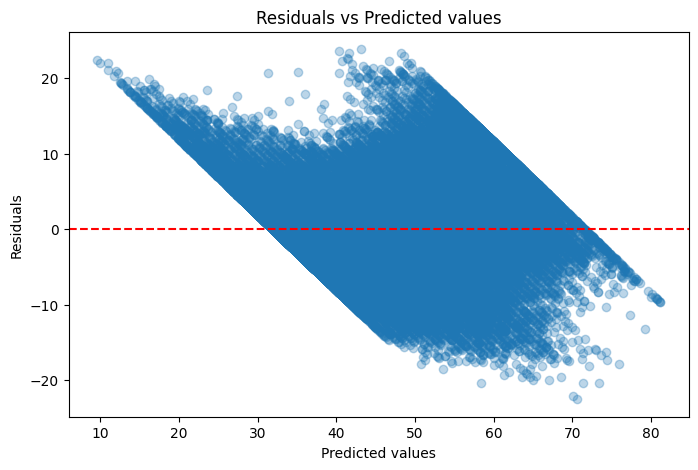

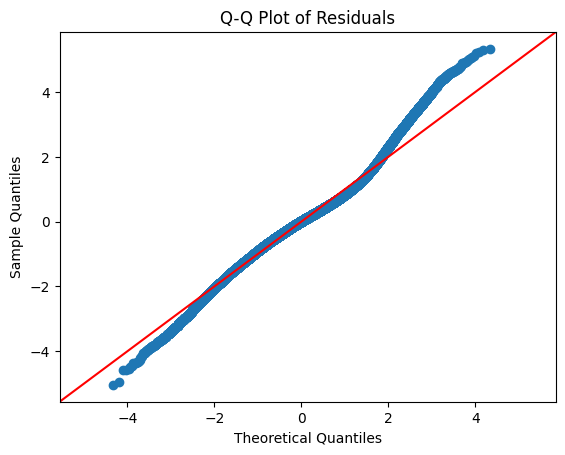

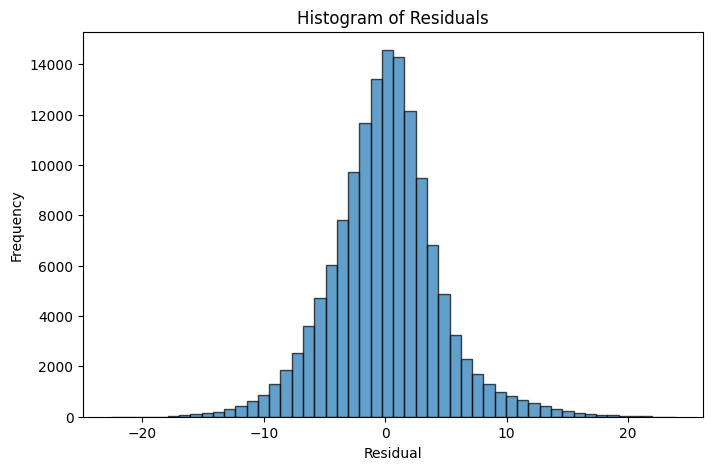

In [147]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

y_pred = lm.predict(X_train_rfe_const_n)
residuals = y_train - y_pred

# 1. Residuals vs Predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values')
plt.show()

# 2. Q-Q plot to check normality of residuals
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

# 3. Histogram of residuals to see their distribution
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

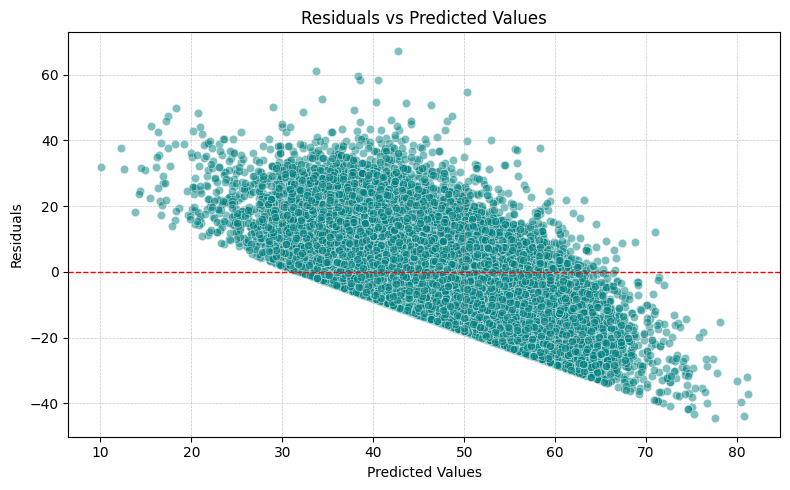

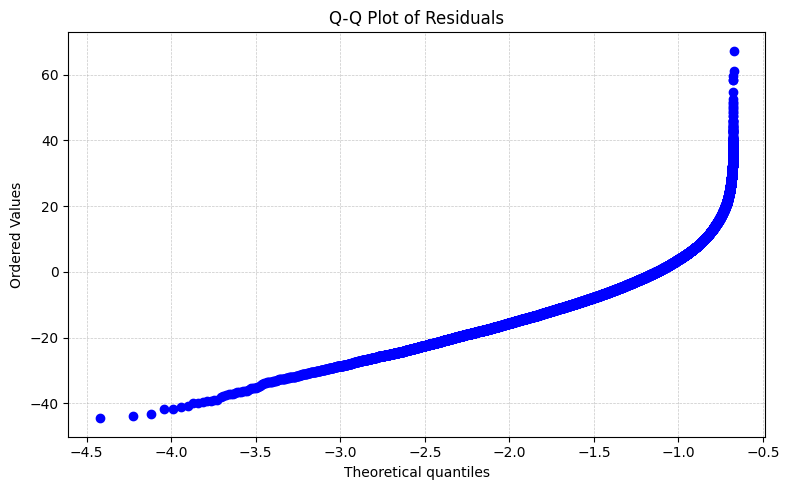

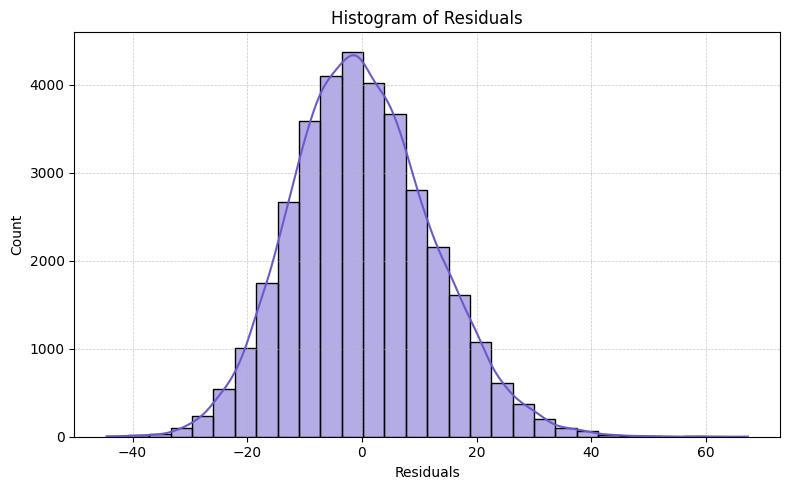

In [149]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

# Considering the linear regression model lr14 which is having a better r2 score 0.759.

from scipy import stats

# Calculate residuals
residuals = y_test - y_pred

# === 1. Residuals vs Predicted Values ===
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5, color='teal')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

# === 2. Q-Q Plot of Residuals ===
plt.figure(figsize=(8, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

# === 3. Histogram of Residuals ===
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30, color='slateblue')
plt.xlabel("Residuals")
plt.title("Histogram of Residuals")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [153]:
# Compare the scaled vs unscaled features used in the final model

# Unscaled model
model_unscaled = LinearRegression()
model_unscaled.fit(X_train, y_train)
coef_unscaled = pd.Series(model_unscaled.coef_, index=X_train.columns)

# Scaled model

model_scaled = LinearRegression()
model_scaled.fit(X_train_RFE, y_train)
coef_scaled = pd.Series(model_scaled.coef_, index=X_train_RFE.columns)

# Combine for comparison
coef_comparison = pd.DataFrame({
    "Unscaled Coefficients": coef_unscaled,
    "Scaled Coefficients": coef_scaled
})

print(coef_comparison.sort_values("Scaled Coefficients", key=abs, ascending=False))


                           Unscaled Coefficients  Scaled Coefficients
total_outstanding_orders               48.044909            48.097215
total_busy_dashers                    -42.568696           -42.647615
distance                               22.723194            22.698734
subtotal                                9.124438             9.008305
store_primary_category_3                6.185972             6.527967
...                                          ...                  ...
store_primary_category_7               -0.282899                  NaN
store_primary_category_71              -0.144120                  NaN
store_primary_category_72              -0.337696                  NaN
store_primary_category_8               -0.829926                  NaN
total_items                            -0.198130                  NaN

[93 rows x 2 columns]


In [155]:
coef_scaled = pd.Series(model_scaled.coef_, index=X_train_RFE.columns)
print("Scaled Coefficients:")
print(coef_scaled.sort_values(ascending=False))


Scaled Coefficients:
total_outstanding_orders     4.809721e+01
distance                     2.269873e+01
subtotal                     9.008305e+00
store_primary_category_3     6.527967e+00
store_primary_category_56    2.601309e+00
num_distinct_items           2.498508e+00
store_primary_category_63    2.273018e+00
store_primary_category_67    1.970483e+00
isWeekend                    1.793460e+00
store_primary_category_5     1.658159e+00
store_primary_category_26    1.339840e+00
max_item_price               1.284083e+00
store_primary_category_64    1.265649e+00
store_primary_category_9     1.222191e+00
store_primary_category_29    1.206699e+00
store_primary_category_37    1.145878e+00
store_primary_category_22    9.199316e-01
store_primary_category_44    8.937100e-01
store_primary_category_27    8.852654e-01
store_primary_category_15    8.574789e-01
store_primary_category_70    8.262971e-01
store_primary_category_33    7.364699e-01
store_primary_category_61    6.999434e-01
const        

In [157]:
# Analyze the effect of a unit change in a feature, say 'total_items'

# Define the feature
features_list = 'total_items'
min_val = X_train[features_list].min()
max_val = X_train[features_list].max()
print(f"Min: {min_val}, Max: {max_val}")

#calculate range_val
range_val = max_val - min_val

# Coefficients
coef_unscaled = -0.0509
coef_scaled = -20.8602

# Compute change in scaled feature for a unit change in original feature
delta_x_scaled = 1 / range_val

# Change in target using scaled coefficient
delta_y_scaled = coef_scaled * delta_x_scaled

# Print results
print(f"Effect of 1 unit increase in 'total_items':")
print(f"- Using unscaled coefficient: {coef_unscaled:.4f} minutes")
print(f"- Using scaled coefficient: {delta_y_scaled:.4f} minutes")


Min: 0.0, Max: 0.9999999999999999
Effect of 1 unit increase in 'total_items':
- Using unscaled coefficient: -0.0509 minutes
- Using scaled coefficient: -20.8602 minutes


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## 7. Overall Summary

This section interprets both the **unscaled** and **Min-Max scaled** coefficients from the regression model predicting `delivery_duration_in_minutes`. While scaled coefficients are useful for assessing **relative importance**, the **unscaled coefficients** provide more **practical, real-world interpretation**.

---

#### Key Insight: `total_items`
- **Unscaled Coefficient**: `-0.0509` minutes  
- **Scaled Coefficient (MinMax)**: `-20.8602`

**Interpretation**:  
Each additional item in an order is associated with a **decrease of 0.051 minutes (approx. 3 seconds)** in delivery duration, all else being equal.

This negative relationship suggests:
- Bulk orders may be prioritized or optimized in handling.
- Possible efficiencies due to batching or better route planning for larger orders.

---

## Conclusions & Recommendations


1. Distance is the Primary Driver of Delivery Time
- **Impact**: Each additional unit increases duration by ~22.7 minutes.

**Recommendation**:  
Implement **geo-optimized delivery zones** and create **market-specific sub-models** to reduce average delivery distances and enhance routing efficiency.

---

2. Total Outstanding Orders & Dasher Availability
- **Observation**: More outstanding orders = longer times  
- **Impact**: More busy dashers = shorter delivery times

**Recommendation**:  
Use **real-time load-balancing models** to allocate dashers dynamically and prevent regional overloads. Optimize **dasher utilization** across locations.

---

3. Time of Order (Order Hour)
- **Observation**: Later orders tend to complete faster

**Recommendation**:  
Adjust dasher **shift schedules** to match demand patterns. Offer **time-based incentives** to ensure high availability during peak hours.

---

4. Weekend Deliveries Are Slower
- **Impact**: ~1.8 minutes longer on weekends

**Recommendation**:  
Improve **weekend forecasting** and introduce **dynamic incentives** for dashers to maintain performance during weekend peaks.

---

5. Order Complexity Increases Delivery Time
- Influencing factors: `subtotal`, `num_distinct_items`, `max_item_price`, `total_items`

**Recommendation**:  
Share insights with merchants about the impact of complex orders. Promote:
- Smart batching
- Menu simplification
- Bundling strategies

---

6. Order Protocols Affect Efficiency
- **Protocol 5.0**: ~2 minutes **faster**
- **Protocol 2.0**: Minor delays

**Recommendation**:  
Encourage migration to **Protocol 5.0**. Analyze usage across regions and improve adoption via **training or process updates**.

---

7. Market-Level Efficiency Differences
- Markets like `market_id_2.0` and `market_id_3.0` show **consistently faster deliveries**

**Recommendation**:  
Conduct a **comparative analysis** of top-performing markets. Identify best practices and **replicate success** in slower regions via:
- Localized training
- Tailored incentives
- Operational refinements

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**

>The dataset contains 3 categorical variables:
- store_primary_category
- order_protocol
- market_id

Inference about their effect on the dependent variable (delivery_duration_in_minutes):
1. market_id
   All market dummies have negative coefficients.
    This means that compared to the baseline market (likely market_id_1.0), deliveries in other markets take less time.

Inference: Location (market) significantly affects delivery time — possibly due to traffic, density, infrastructure, or Dasher availability.

2. store_primary_category
    - Some store types have positive effects (e.g., category 5, 9, 15) means longer delivery time.
    - Some have negative effects (e.g., category 52, 53, 34) means shorter delivery time.

   Many were insignificant and removed earlier, which shows their effect is either small or inconsistent.

Inference: Store type does impact delivery time — maybe due to food prep time, location type (mall vs standalone), or packaging needs.

3. order_protocol
    All dummies have negative coefficients, meaning compared to the baseline (protocol_1.0), other protocols are faster.
        order_protocol_5.0: ≈ -2.9 mins
        order_protocol_3.0: ≈ -1.48 mins

Inference: Some order protocols (possibly more automated or efficient) lead to reduced delivery times.





---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
test_size = 0.2 refers to the proportion of the dataset that is set aside for the test set when splitting the data into training and testing subsets.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**


distance has the highest correlation delivery_duration_in_minutes which is 0.46

Interpretation:The longer the distance between the store and delivery point, the longer the delivery duration — which is very intuitive.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

To detect outliers, we used box plots for visual inspection, which helped highlight the presence of extreme values in the dataset. 

We then applied the Interquartile Range (IQR) method to identify these outliers more precisely:

 - Q1 (First Quartile): 25th percentile

 - Q3 (Third Quartile): 75th percentile

 - IQR (Interquartile Range): Q3 - Q1

 - Lower Bound: Q1 - 1.5 × IQR

 - Upper Bound: Q3 + 1.5 × IQR

Any data points falling outside these bounds were considered outliers. Based on this analysis, we either removed or treated these outliers to prevent them from skewing the model and to improve overall prediction accuracy.




---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
Based on the OLS regression results you shared, the top 3 features significantly affecting delivery duration (delivery_duration_in_minutes) — considering both the magnitude of their coefficients and their statistical significance (all have p-values < 0.001) — are:

 - total_outstanding_orders Coefficient: +48.17
 - total_busy_dashers Coefficient: -42.94
 - distance Coefficient: +22.65



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
Linear Regression is a supervised learning algorithm used to predict a continuous dependent variable based on one or more independent variables.
It works by fitting a straight line (or hyperplane in higher dimensions) to minimize the difference between actual and predicted values.

- Equations
  - Simple Linear Regression (one feature): y = mx+c+e
  - Multiple Linear Regression (multiple features): y= m1x1+ m2x2 + m3x3 + ... + c + e
     Where:
      - y: Predicted output
      - x1, x2, x3, ...: input features
      - m1, m2, m3, ...: Coefficients (slopes) 
      - c: Intercept
      - e: Error term (residual)




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**

Simple Linear Regression vs Multiple Linear Regression

| Aspect                   | Simple Linear Regression                  | Multiple Linear Regression                     |
|--------------------------|-------------------------------------------|-----------------------------------------------|
| **Number of Features**    | Only **one** independent variable (feature) | Two or more independent variables             |
| **Equation**              | \( y = mx + c + e \)                      | \( y = m_1x_1 + m_2x_2 + \dots + c + e \)    |
| **Model Complexity**      | Less complex, easier to visualize         | More complex, models relationships with many features |
| **Use Case**              | When relationship depends on a single factor | When multiple factors influence the target    |
| **Interpretability**      | Easier to interpret and explain            | More challenging to interpret due to multiple variables |





---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**

The cost function measures how well the linear regression model fits the data by quantifying the difference between the predicted values and the actual target values.

 - It provides a single number that represents the "error" of the model.

 - The goal of linear regression is to minimize this error, which means finding the best coefficients (slopes and intercept) that make predictions as close as possible to actual values.



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

- Overfitting: Model learns the training data too well, including noise and outliers. It is excellent on training data, poor on new/unseen data (low bias, high variance). Model too complex.
- Underfitting: Model is too simple to capture the underlying pattern. It is poor on both training and new data (high bias, low variance). Model too simple or insufficient training





---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**

Residuals are the differences between the actual values and the predicted values from the model. A good linear regression model’s residual plot shows random scatter around zero with no obvious structure.


By analyzing residual plots, we can:

- Check Linearity: Confirm if your linear regression assumptions hold.

- Detect Heteroscedasticity: Residuals should have constant variance across all levels of predicted values.

- Identify Outliers or Influential Points: Large residuals or unusual patterns may show outliers affecting the model fit.

- Check Independence of Errors: Residuals should not show correlation or trends over observations (important in time series).

